# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA


El presente proyecto tiene el objetivo de analizar y conocer el conjunto de datos para posteriormente, implementar las herramientas correspondientes a Series de Tiempo y poder estimar el flujo vehicular de las estaciones de peaje en la Ciudad de Buenos Aires, Argentina entre los años 2017 - 2020.

**Los dataset se pueden descargar [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa).
En este caso se trabajó con los años 2017, 2018 y 2019.**


**Nota:** Para este proyecto, solo se ocupó los datos de la autopista Illia, pago en Efectivo para realizar la predicción.


### Exploración de datos

Se consideró por lo menos identificar los días y horarios de mayor tráfico y adicionalmente se busco tener agrupaciones que nos permitieran observar cual es el comportamiento de flujo vehicular en las estaciones de peaje y el tipo de pago a través de los años trabajados.

#### Componentes de la serie


Calculamos los componentes estacionales y tendencias de la serie


### Predicción a Futuro

Dentro de la implemmentación del modelo de Machine Learning se consideraron los soguientes puntos:

1. Realizar todas las transformaciones necesarias. 
2. Elegir un modelo benchmark 
3. Optimizar los hiperparámetros del modelo. 
4. Utilizar el modelo creado para predecir el tráfico en el año 2020



### 1. Preparación del Dataset

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

### Unimos los 3 datasets

In [10]:
dataset=pd.concat([data_2019,data_2018,data_2017])

In [11]:
print(dataset.shape)
dataset.head()

(3560706, 10)


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [12]:
#Observamos si el dataset cuenta con datos faltantes
dataset.isna().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

Unificamos valores en las columnas

In [13]:
dataset.estacion=dataset.estacion.replace({"Alberti":"Alberdi", "Dellepiane Centro": "Dellepiane",
                                           "Dellepiane Liniers": "Dellepiane" }) 


In [14]:
dataset.forma_pago=dataset.forma_pago.replace({"T. DISCAPACIDAD":"TARJETA DISCAPACIDAD"}) 

In [15]:
print(dataset['forma_pago'].unique())
print("\n",dataset['estacion'].unique())
dataset.head()

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'TARJETA DISCAPACIDAD' 'MONEDERO' 'Otros']

 ['Alberdi' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberdi,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberdi,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberdi,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberdi,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [16]:
#Construiremos el dataset con el que realizaremos el EDA
datasetF=dataset
datasetF['Fecha_C'] = pd.to_datetime(datasetF.fecha) + pd.to_timedelta(datasetF.hora_fin, unit = 'h')

In [17]:
#ordenamos el dataset
datasetF.sort_values("Fecha_C", inplace=True)
datasetF.reset_index(drop=True, inplace = True)
datasetF

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,Fecha_C
0,2017,2017-01-01,23,0,Domingo,Dellepiane,Centro,Liviano,NO COBRADO,6,2017-01-01 00:00:00
1,2017,2017-01-01,23,0,Domingo,Illia,Provincia,Liviano,EFECTIVO,9,2017-01-01 00:00:00
2,2017,2017-01-01,23,0,Domingo,Illia,Provincia,Liviano,NO COBRADO,3,2017-01-01 00:00:00
3,2017,2017-01-01,23,0,Domingo,Dellepiane,Provincia,Liviano,INFRACCION,3,2017-01-01 00:00:00
4,2017,2017-01-01,23,0,Domingo,Avellaneda,Centro,Liviano,NO COBRADO,36,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
3560701,2019,2019-12-31,22,23,Martes,Dellepiane,Provincia,Pesado,TELEPASE,13,2019-12-31 23:00:00
3560702,2019,2019-12-31,22,23,Martes,Dellepiane,Provincia,Pesado,NO COBRADO,1,2019-12-31 23:00:00
3560703,2019,2019-12-31,22,23,Martes,Dellepiane,Provincia,Pesado,EXENTO,2,2019-12-31 23:00:00
3560704,2019,2019-12-31,22,23,Martes,Dellepiane,Provincia,Liviano,TELEPASE,150,2019-12-31 23:00:00


# Parte A
## Análisis Exploratorio de Datos

### Días de mayor tráfico
#### Agruparemos los datos de forma a diaria para ver los días en que se tiene mayor flujo vehicular

In [19]:
dias_t=pd.DataFrame(datasetF.groupby("dia",sort=True)["dia"].count().reset_index(name="Total"))
dias_t.sort_values(by=["Total"], ascending=False,inplace=True, ignore_index=True)
# dias_t.index(start=1, stop=8, step=1)
dias_t

,dia,Total
0,Viernes,533516
1,Miércoles,530814
2,Jueves,529499
3,Martes,524142
4,Lunes,513441
5,Sábado,485495
6,Domingo,443799


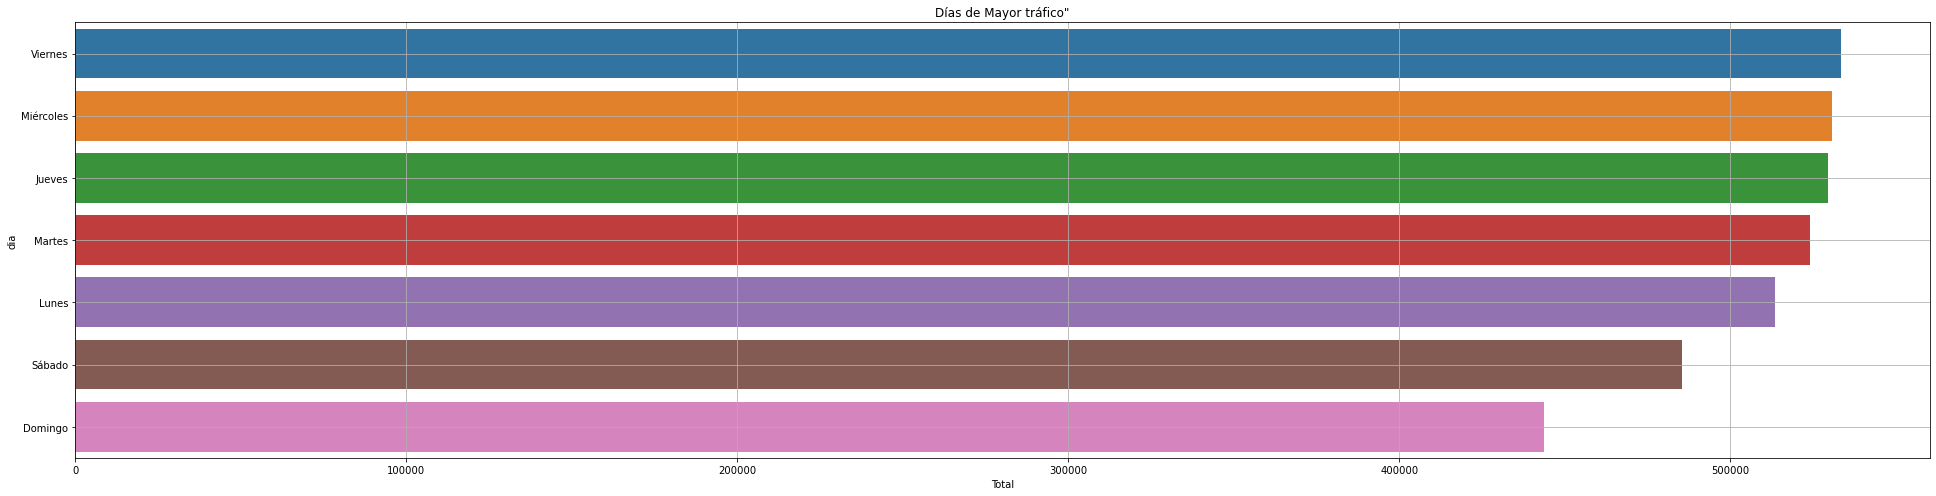

In [20]:
#Graficamos los resultados tráfico por dia
plt.figure(figsize = (27,7))
# plt.subplot(1,2,1)
sns.barplot(data=dias_t,x="Total", y="dia", orient="h" )
# ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.title('Días de Mayor tráfico"')
plt.tight_layout()
# plt.ylim(0,60000)
plt.grid()

In [22]:
#Tráfico diario por año
dias_año=pd.DataFrame(datasetF.groupby(by=["periodo","dia"])["cantidad_pasos"].count())
# dias_año.sort_values(by=["dia"], ascending=False,inplace=True, ignore_index=True)
# dias_t.index(start=1, stop=8, step=1)
dias_año

cantidad_pasos
periodo dia                      
2017    Domingo            168104
        Jueves             203298
        Lunes              198573
        Martes             202956
        Miércoles          206428
        Sábado             186460
        Viernes            206826
2018    Domingo            165099
        Jueves             208075
        Lunes              198935
        Martes             201999
        Miércoles          208673
        Sábado             184360
        Viernes            208767
2019    Domingo            110596
        Jueves             118126
        Lunes              115933
        Martes             119187
        Miércoles          115713
        Sábado             114675
        Viernes            117923

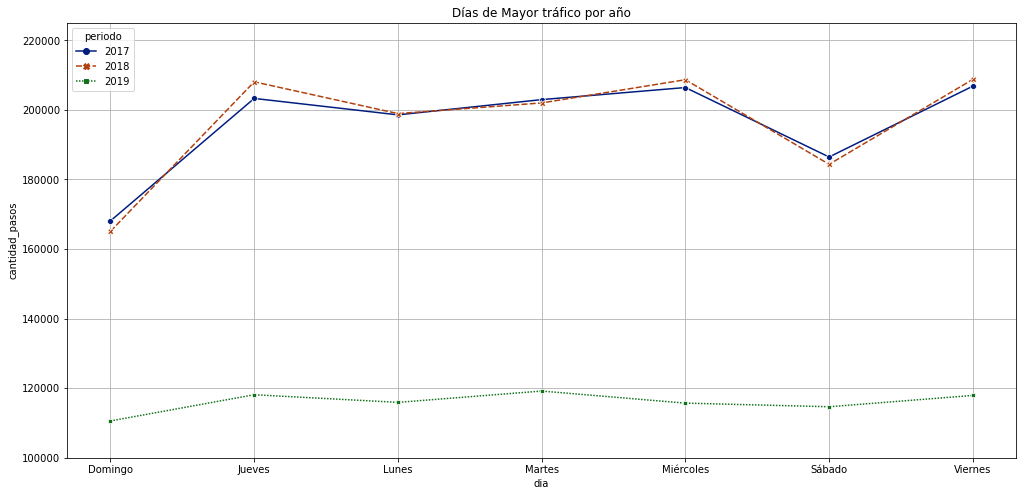

In [23]:
plt.figure(figsize=(17,8))
sns.lineplot(data=dias_año,y="cantidad_pasos",x="dia",hue="periodo",palette="dark",markers=True, style="periodo")
plt.title("Días de Mayor tráfico por año")
plt.ylim(100000,225000)
plt.grid()


## Horas de mayor tráfico

In [24]:
HoraM=pd.pivot_table(datasetF, values="cantidad_pasos",columns=["hora_fin"],aggfunc=np.mean,index=["periodo","dia"])
HoraM

hora_fin                  0          1          2          3          4   \
periodo dia                                                                
2017    Domingo    57.036819  67.325604  70.085306  57.094387  39.381736   
        Jueves     46.808624  37.909858  25.804833  16.405723  13.617627   
        Lunes      39.188829  39.888439  27.312873  20.560689  17.870550   
        Martes     40.379693  28.967062  19.008051  13.300780  12.390677   
        Miércoles  43.934923  31.360658  20.747048  14.861414  13.933764   
        Sábado     63.719008  51.191308  45.334893  33.796520  25.112286   
        Viernes    54.880485  39.279109  27.449399  18.491924  16.120033   
2018    Domingo    58.801561  65.705757  66.679797  53.948276  39.075160   
        Jueves     45.760477  39.009644  24.135888  15.543009  13.937542   
        Lunes      41.259516  42.399880  28.704205  21.578268  17.687870   
        Martes     41.587941  30.506188  21.875185  16.991208  15.242996   
        Miércoles  43.574486  31.684363  20.862096  15.325443  14.385714   
        Sábado     62.203780  49.802080  45.147327  34.605769  25.578504   
        Viernes    54.533224  39.155256  27.004832  18.600128  16.108830   
2019    Domingo    88.863892  83.587572  76.441400  59.928443  43.985496   
        Jueves     76.973159  60.903338  41.773094  29.003454  25.404024   
        Lunes      72.411670  68.652658  48.559730  36.608473  29.900519   
        Martes     71.901673  56.614438  40.650837  31.085886  26.747247   
        Miércoles  76.382896  59.615662  44.467684  33.898888  28.982451   
        Sábado     87.872273  78.348317  65.561955  47.785176  36.568029   
        Viernes    89.845459  71.000463  51.280511  37.061642  30.470870   

hora_fin                  5          6           7           8           9   \
periodo dia                                                                   
2017    Domingo    31.962198  35.787488   39.214391   40.031600   46.307504   
        Jueves     18.698526  38.357043   79.955943  126.201786  140.458496   
        Lunes      21.143013  40.093484   77.725026  120.179332  128.651142   
        Martes     17.943669  37.468702   78.179857  124.163462  137.840783   
        Miércoles  19.015808  39.119014   80.639625  126.973051  140.090380   
        Sábado     25.532589  36.261999   48.791354   64.738253   86.058789   
        Viernes    20.657010  40.411303   79.219554  123.357569  135.167119   
2018    Domingo    31.866743  36.795149   40.230920   41.406301   47.458635   
        Jueves     19.051298  39.720740   82.753161  124.457097  136.147804   
        Lunes      21.364656  41.686006   80.608571  114.784610  122.267151   
        Martes     19.197726  40.038984   82.250029  121.483205  132.459177   
        Miércoles  19.330983  39.934229   82.307849  121.543975  133.414603   
        Sábado     26.022038  37.266485   50.479615   65.040814   85.116072   
        Viernes    20.606523  41.428369   82.009304  120.413845  130.731560   
2019    Domingo    41.078927  59.854835   89.316649  117.213652  131.575456   
        Jueves     32.754364  67.890073  139.521416  210.420184  233.412456   
        Lunes      36.267463  69.730130  134.068112  198.132293  215.804222   
        Martes     33.648295  65.771287  134.375959  201.348902  223.290590   
        Miércoles  34.482802  68.236667  138.149929  208.667571  228.353402   
        Sábado     39.042716  63.083890  100.929708  140.175529  168.259761   
        Viernes    35.937853  68.031407  132.167766  196.881667  217.587206   

hora_fin           ...          14          15          16          17  \
periodo dia        ...                                                   
2017    Domingo    ...   97.966710   76.266588   82.934794  100.574519   
        Jueves     ...  123.856094  124.230603  125.949257  127.152059   
        Lunes      ...  113.431789  114.189151  115.330787  118.611825   
        Martes     ...  119.662712  120.956140  122.197058  122

Text(0.5, 1.0, 'Hora de mayor tráfico por día')

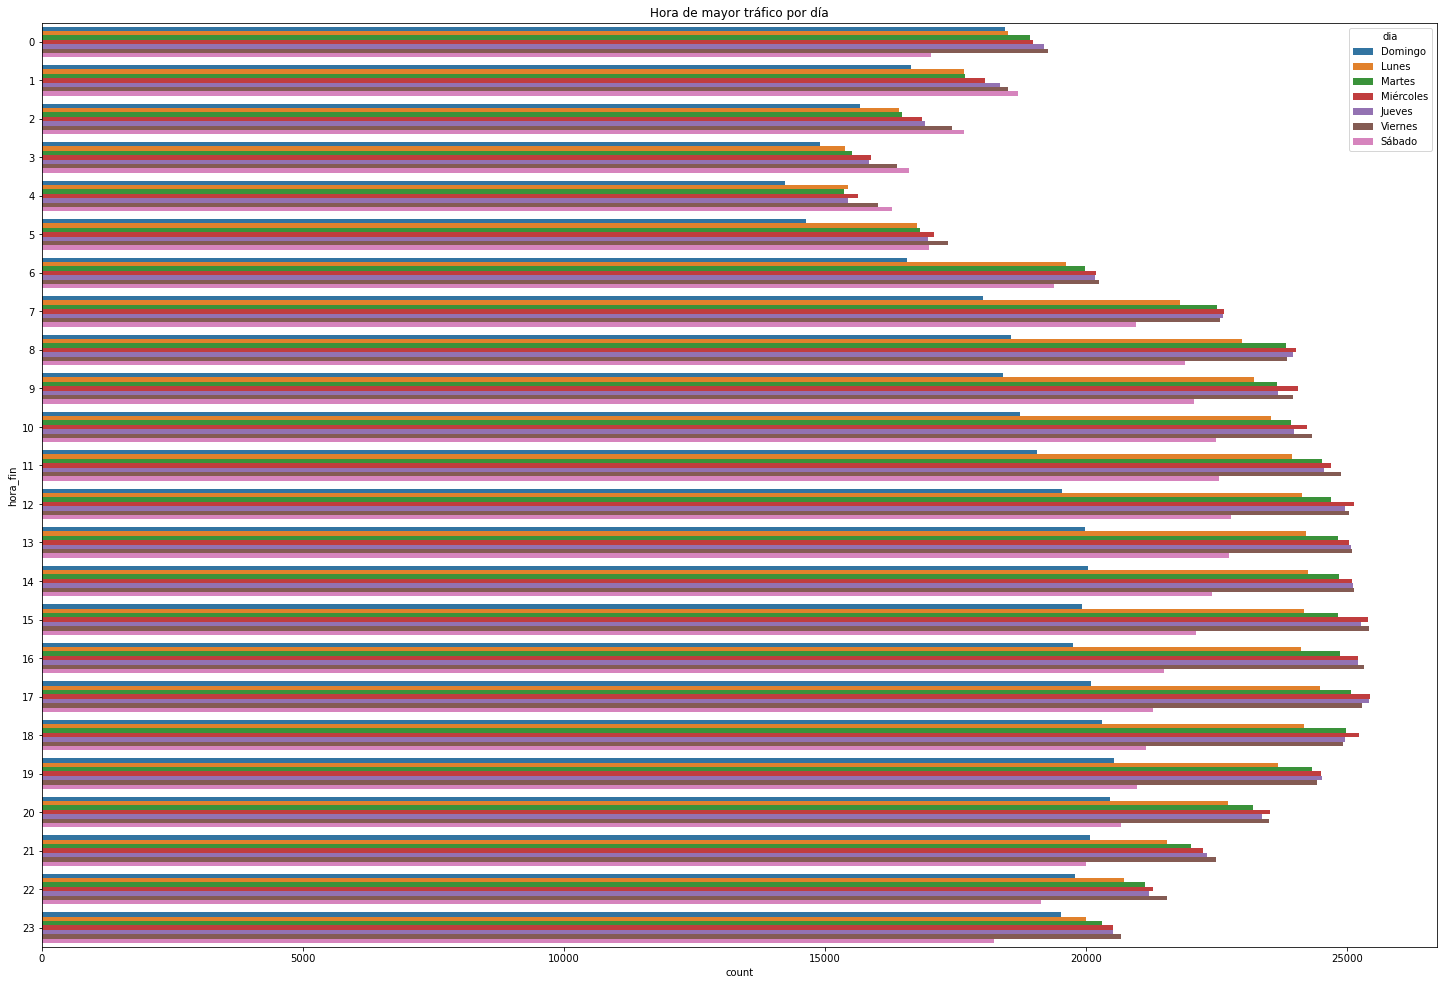

In [25]:
plt.figure(figsize=(25,17))
sns.countplot(data=datasetF, y="hora_fin", hue="dia",orient="h")
plt.title("Hora de mayor tráfico por día")

## Representación de la forma de pago a través de los años

In [26]:
TPago=datasetF[["forma_pago", "periodo","cantidad_pasos"]].groupby(["forma_pago", "periodo"]).count()
TPago

cantidad_pasos
forma_pago           periodo                
EFECTIVO             2017             447203
                     2018             423633
                     2019             149340
EXENTO               2017             169889
                     2018             162103
                     2019             132716
INFRACCION           2017             140275
                     2018             153331
                     2019             111428
MONEDERO             2017                 14
NO COBRADO           2017             117730
                     2018             121440
                     2019             141280
Otros                2017                  8
TARJETA DISCAPACIDAD 2017             100106
                     2018              86348
                     2019              76001
TELEPASE             2017             397420
                     2018             429053
                     2019             201388

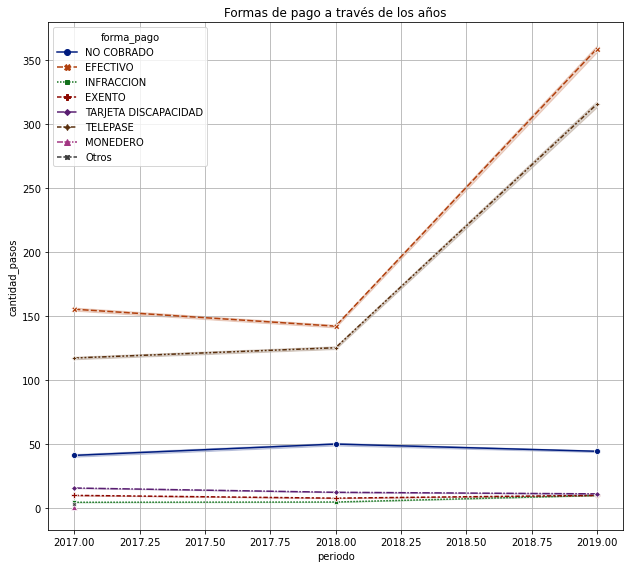

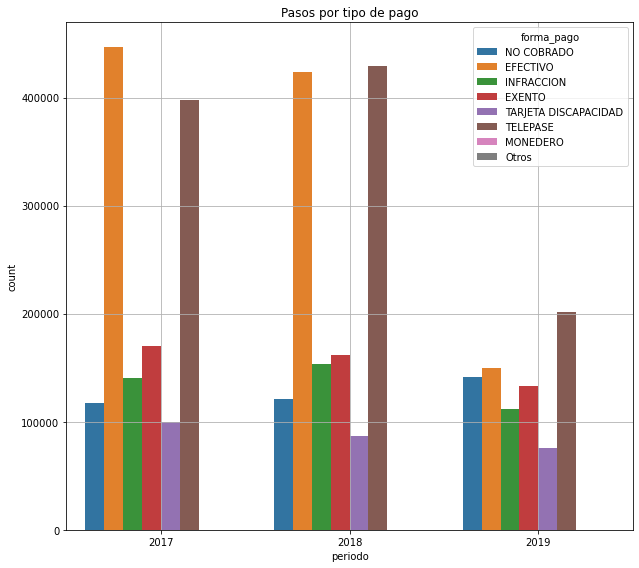

In [27]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
sns.lineplot(data=datasetF,y="cantidad_pasos",x="periodo",hue="forma_pago",palette="dark",markers=True, style="forma_pago")
# sns.lineplot(data=datasetF2,y="cantidad_pasos",x="forma_pago",hue="periodo",palette="dark",markers=True, style="periodo")

plt.title('Formas de pago a través de los años')
plt.tight_layout()
# plt.ylim(0,60000)
plt.grid()

plt.figure(figsize = (17,8))
plt.subplot(1,2,1)
sns.countplot(data=datasetF, x="periodo",hue="forma_pago" )
# ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.title('Pasos por tipo de pago')
plt.tight_layout()
# plt.ylim(0,60000)
plt.grid()

In [34]:
datasetF.head(3)

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,Fecha_C
0,2017,2017-01-01,0,1,Domingo,Dellepiane,Centro,Liviano,NO COBRADO,349,2017-01-01 01:00:00
1,2017,2017-01-01,0,1,Domingo,Alberdi,Provincia,Liviano,NO COBRADO,62,2017-01-01 01:00:00
2,2017,2017-01-01,0,1,Domingo,Avellaneda,Provincia,Liviano,TELEPASE,109,2017-01-01 01:00:00


In [28]:
TEstacion=datasetF[["estacion", "periodo","cantidad_pasos"]].groupby(["estacion", "periodo"]).count()
TEstacion

cantidad_pasos
estacion   periodo                
Alberdi    2017             150583
           2018             153037
           2019             132279
Avellaneda 2017             391842
           2018             394371
           2019             186443
Dellepiane 2017             357124
           2018             353441
           2019             187600
Illia      2017             291900
           2018             299519
           2019             161133
PDB        2019              40964
Retiro     2017             133584
           2018             119969
           2019              53975
Salguero   2017              23381
           2018              28058
           2019              24869
Sarmiento  2017              24231
           2018              27513
           2019              24890

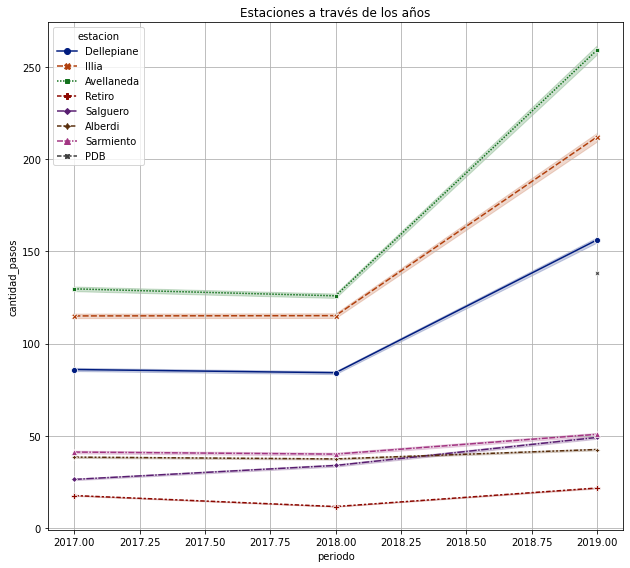

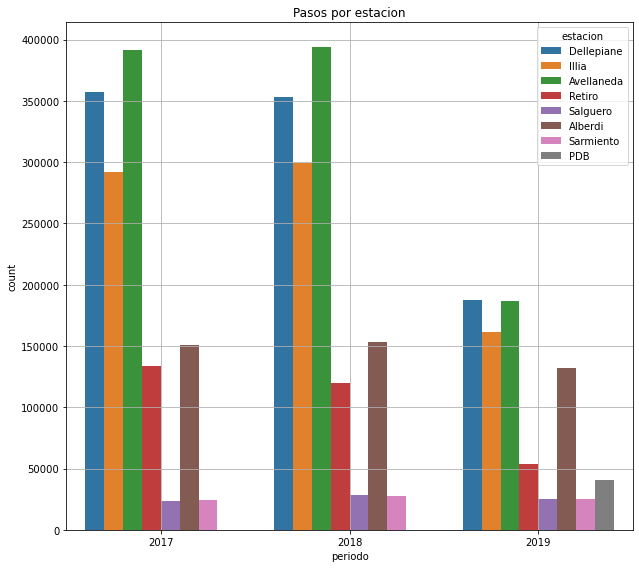

In [29]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
sns.lineplot(data=datasetF,y="cantidad_pasos",x="periodo",hue="estacion",palette="dark",markers=True, style="estacion")
# sns.lineplot(data=datasetF2,y="cantidad_pasos",x="forma_pago",hue="periodo",palette="dark",markers=True, style="periodo")

plt.title('Estaciones a través de los años')
plt.tight_layout()
# plt.ylim(0,60000)
plt.grid()

plt.figure(figsize = (17,8))
plt.subplot(1,2,1)
sns.countplot(data=datasetF, x="periodo",hue="estacion" )
# ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.title('Pasos por estacion')
plt.tight_layout()
# plt.ylim(0,60000)
plt.grid()

In [30]:
datasetF

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,Fecha_C
0,2017,2017-01-01,23,0,Domingo,Dellepiane,Centro,Liviano,NO COBRADO,6,2017-01-01 00:00:00
1,2017,2017-01-01,23,0,Domingo,Illia,Provincia,Liviano,EFECTIVO,9,2017-01-01 00:00:00
2,2017,2017-01-01,23,0,Domingo,Illia,Provincia,Liviano,NO COBRADO,3,2017-01-01 00:00:00
3,2017,2017-01-01,23,0,Domingo,Dellepiane,Provincia,Liviano,INFRACCION,3,2017-01-01 00:00:00
4,2017,2017-01-01,23,0,Domingo,Avellaneda,Centro,Liviano,NO COBRADO,36,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
3560701,2019,2019-12-31,22,23,Martes,Dellepiane,Provincia,Pesado,TELEPASE,13,2019-12-31 23:00:00
3560702,2019,2019-12-31,22,23,Martes,Dellepiane,Provincia,Pesado,NO COBRADO,1,2019-12-31 23:00:00
3560703,2019,2019-12-31,22,23,Martes,Dellepiane,Provincia,Pesado,EXENTO,2,2019-12-31 23:00:00
3560704,2019,2019-12-31,22,23,Martes,Dellepiane,Provincia,Liviano,TELEPASE,150,2019-12-31 23:00:00


Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [31]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(datasetF.estacion=='Illia', datasetF.forma_pago == 'EFECTIVO')
datasetF1 = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
datasetF1.drop(columns = ['hora_inicio','forma_pago', 'estacion'], inplace = True)

datasetF1.head()

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha_C
1,2017,2017-01-01,0,Domingo,Provincia,Liviano,9,2017-01-01
23,2017,2017-01-01,0,Domingo,Provincia,Liviano,644,2017-01-01
40,2017,2017-01-01,0,Domingo,Provincia,Pesado,2,2017-01-01
41,2017,2017-01-01,0,Domingo,Provincia,Pesado,1,2017-01-01
43,2017,2017-01-01,0,Domingo,Provincia,Pesado,1,2017-01-01


In [32]:
#Reordenamos el dataset por fecha
datasetF1.sort_values('Fecha_C', inplace = True)
datasetF1.reset_index(drop=True, inplace = True)
datasetF1

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha_C
0,2017,2017-01-01,0,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
1,2017,2017-01-01,0,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
2,2017,2017-01-01,0,Domingo,Provincia,Pesado,2,2017-01-01 00:00:00
3,2017,2017-01-01,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
4,2017,2017-01-01,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...
238864,2019,2019-12-31,22,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238865,2019,2019-12-31,22,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238866,2019,2019-12-31,22,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238867,2019,2019-12-31,23,Martes,Provincia,Liviano,190,2019-12-31 23:00:00


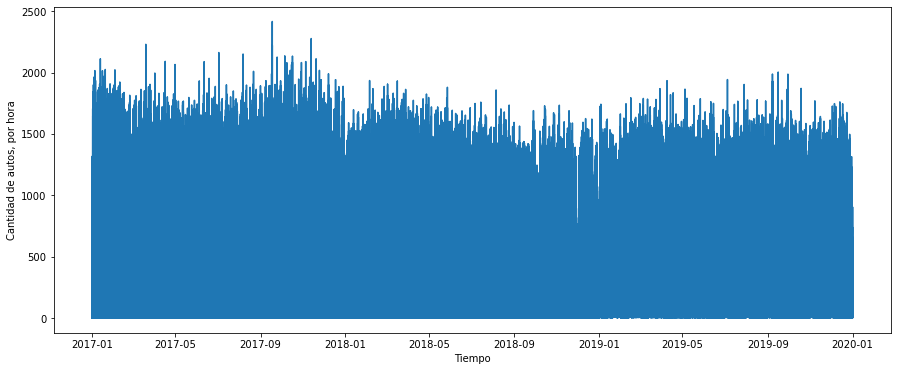

In [33]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(datasetF1.Fecha_C, datasetF1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

# Resampleo

In [14]:
datasetF1.head(3)

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha_C
0,2017,2017-01-01,0,Domingo,Provincia,Liviano,9,2017-01-01
1,2017,2017-01-01,0,Domingo,Provincia,Liviano,644,2017-01-01
2,2017,2017-01-01,0,Domingo,Provincia,Pesado,2,2017-01-01


In [34]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = datasetF1.resample('D', on = 'Fecha_C').sum()
diario=diario.drop(columns=["periodo", "hora_fin"])
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
Fecha_C,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [61]:
# diario.tail()

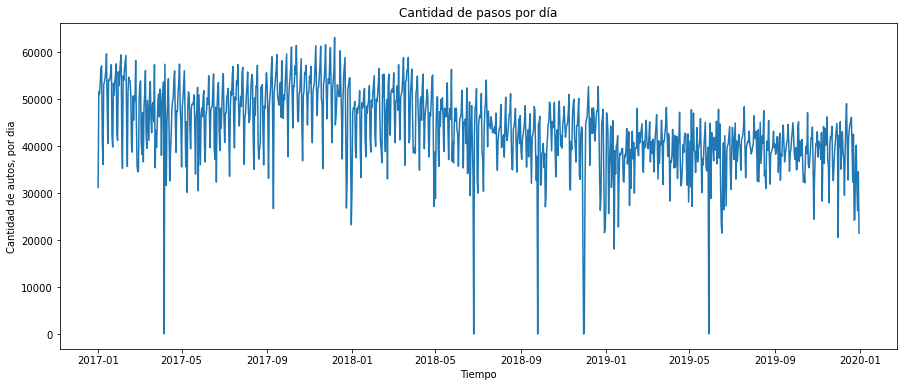

In [35]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title("Cantidad de pasos por día")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [21]:
#observamos los estadisticos de nuestra serie 
diario.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


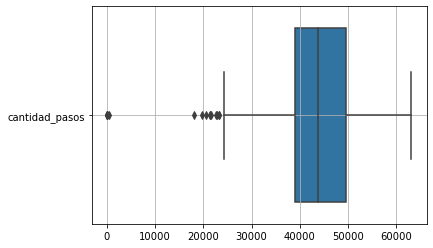

In [36]:
# Observamos la distribución de los datos
sns.boxplot(data=diario, orient="horizontal")
plt.grid()

In [37]:
#De acuerdo al boxplot anterior, observaremos los valores atipicos de la serie
AtipicosD=diario[diario.cantidad_pasos <= 23000]
AtipicosD

,cantidad_pasos
Fecha_C,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-29,19728
2018-11-30,0
2018-12-01,350
2018-12-30,21559
2018-12-31,22599
2019-01-13,18076


### Investigación de días con frecuencia vehicular atipica

Ya que estamos trabajando con una serie de tiempo solo tomaremos los días con número de pasos menor a 1000 como valores atipicos de la serie, debido a que los días restantes presentan cifras muy cercanas al primer cuartil de la distribución.

De acuerdo a lo anterior se investigo sobre estos días y observamos que son valores perdidos y que el poco o nulo fluho vehicular se debe a lo siguiente:

- 6 abril 2017: Paro nacional por la convocatoria de la Confederación General del Trabajo (CGT) a una huelga nacional, la primera que los sindicatos peronistas declaran al presidente Mauricio Macri. 
    
- 25 junio 2018: Tercer paro general contra la gestión de Mauricio Macri
    
- 25 septiembre 2018:  Cuarto paro general contra la gestión de Mauricio Macri
    
- 30 noviembre 2018: Día feriado por motivo de la cumbre del G20
    
- 1 de diciembre 2018: Apertura de autopista 10 pm por motivo de la Cumbre G20
    
- 29 mayo de 2019: Quinto paro general contra el presidente Mauricio Marcri

    

In [38]:
#Resampleamos por semana
semana = datasetF1.resample('W', on = 'Fecha_C').sum()
semana=semana.drop(columns=["periodo", "hora_fin"])
print(diario.shape)
semana.head()

(1095, 1)


,cantidad_pasos
Fecha_C,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


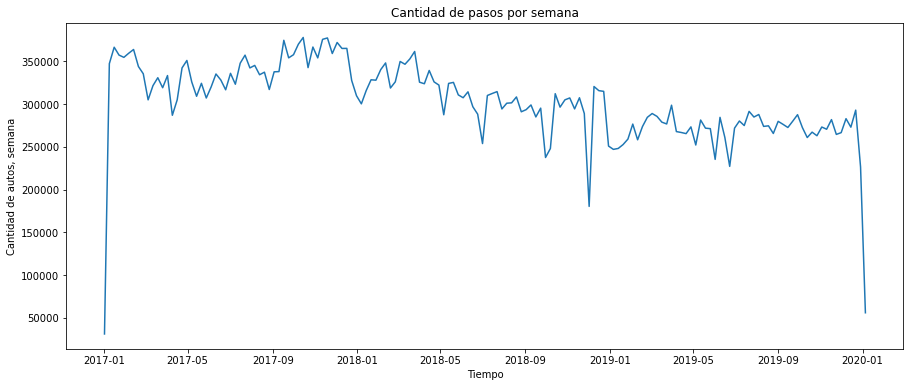

In [40]:
plt.figure(figsize = (15,6))
plt.plot(semana.index, semana.cantidad_pasos)
plt.title("Cantidad de pasos por semana")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, semana')
plt.show()

In [42]:
mes = datasetF1.resample('M', on = 'Fecha_C').sum()
mes=mes.drop(columns=["periodo", "hora_fin"])
print(diario.shape)
mes.head()

(1095, 1)


,cantidad_pasos
Fecha_C,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


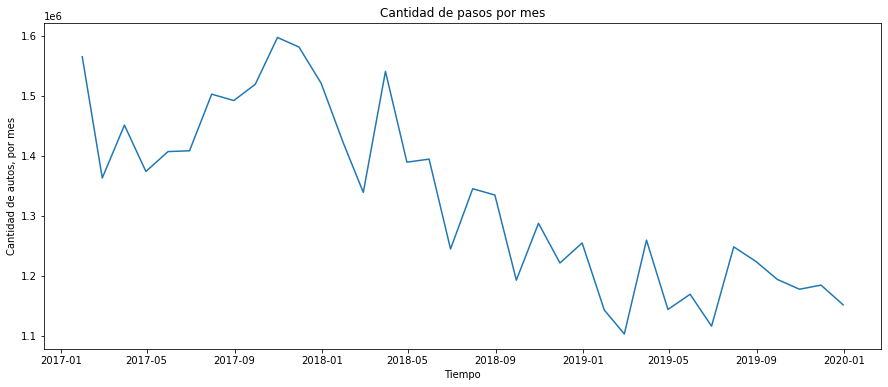

In [43]:
plt.figure(figsize = (15,6))
plt.plot(mes.index, mes.cantidad_pasos)
plt.title("Cantidad de pasos por mes")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

Con el resampleo mensual se observa de forma clara que la serie de tiempo en la estación Ilia y con el metdodo de pago efectivo tiene una tendencia a la baja 

## Componentes de la serie

#### Media Móvil

In [44]:
diario["Diario_promedio"]=diario["cantidad_pasos"].rolling(window=7).mean()
# diario.iloc[6:10]

In [45]:
diario

,cantidad_pasos,Diario_promedio
Fecha_C,,
2017-01-01,31183,NaN
2017-01-02,51568,NaN
2017-01-03,51093,NaN
2017-01-04,53332,NaN
2017-01-05,56486,NaN
...,...,...
2019-12-27,40182,34441.428571
2019-12-28,30681,33209.714286
2019-12-29,26259,32341.428571


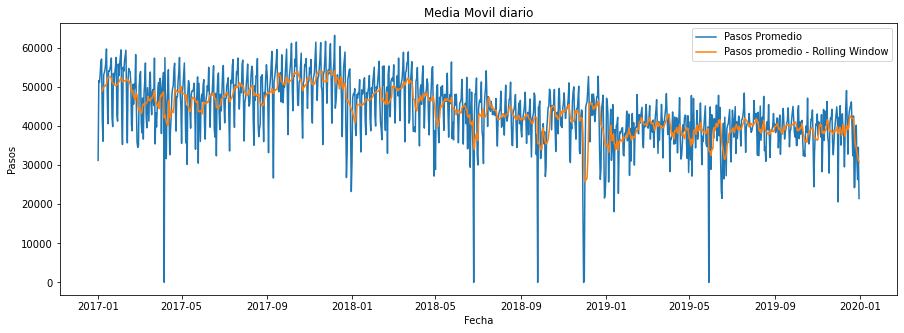

In [46]:
plt.figure(figsize = (15,5))
# plt.plot(semanaF.index, semanaF.cantidad_pasos, label = 'Pasos promedio')
plt.plot(diario.index, diario.cantidad_pasos, label = 'Pasos Promedio')
plt.plot(diario.Diario_promedio,  label = "Pasos promedio - Rolling Window" )
plt.title(label="Media Movil diario")
plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.legend()
plt.show()

In [47]:
#Media móvil semanal

semana["semana_promedio"]=semana["cantidad_pasos"].rolling(window=4).mean()

In [48]:
semana

,cantidad_pasos,semana_promedio
Fecha_C,,
2017-01-01,31183,NaN
2017-01-08,347212,NaN
2017-01-15,366413,NaN
2017-01-22,357215,275505.75
2017-01-29,354581,356355.25
...,...,...
2019-12-08,282891,273934.00
2019-12-15,272960,271726.50
2019-12-22,292881,278821.75


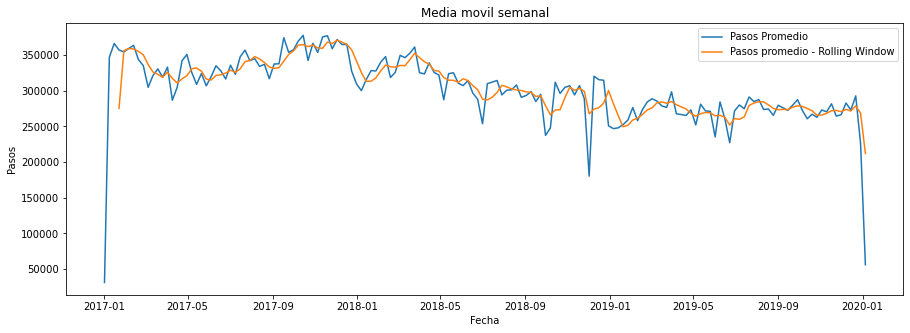

In [49]:
plt.figure(figsize = (15,5))
plt.plot(semana.index, semana.cantidad_pasos, label = 'Pasos Promedio')
plt.plot(semana.semana_promedio,  label = "Pasos promedio - Rolling Window" )
plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.title(label="Media movil semanal")
plt.legend()
plt.show()

#### A continuación vamos a ver la tendencia lineal de la serie, para lo cual convertiremos la fecha en números y se pueda aplicarse una regresión lineal

In [50]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head(10)

,cantidad_pasos,Diario_promedio,fecha_numeros
Fecha_C,,,
2017-01-01,31183,NaN,736330
2017-01-02,51568,NaN,736331
2017-01-03,51093,NaN,736332
2017-01-04,53332,NaN,736333
2017-01-05,56486,NaN,736334
2017-01-06,57081,NaN,736335
2017-01-07,41587,48904.285714,736336
2017-01-08,36065,49601.714286,736337
2017-01-09,53036,49811.428571,736338


In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

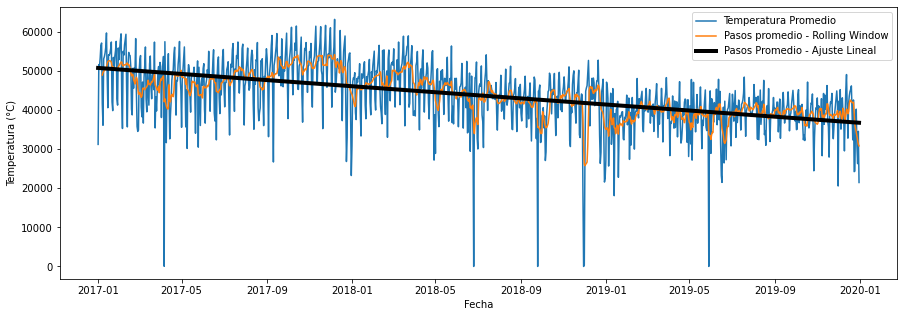

In [52]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Temperatura Promedio')
plt.plot(diario.Diario_promedio,  label = "Pasos promedio - Rolling Window" )
# plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Pasos Promedio - Ajuste Lineal',color="black")
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

### Observamos los componentes restantes

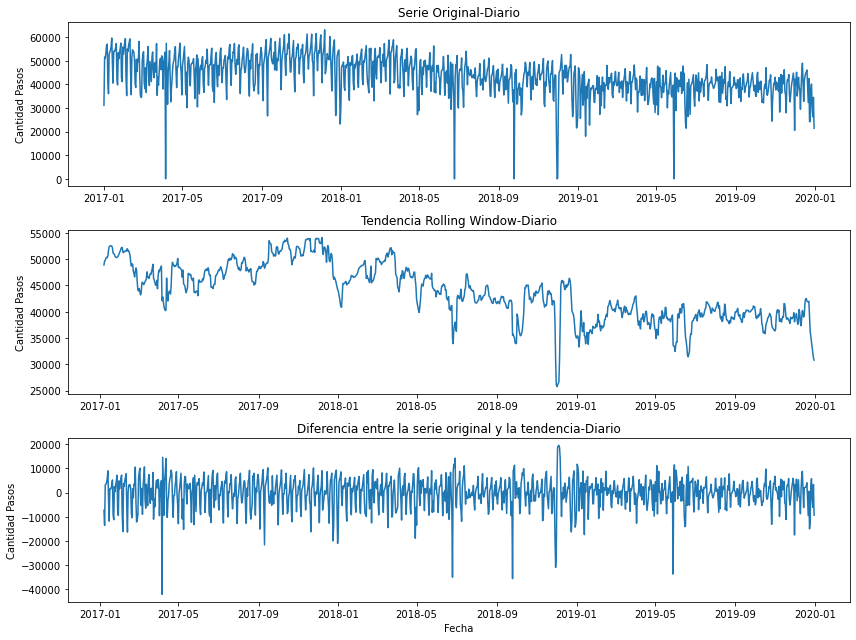

In [53]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original-Diario')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad Pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window-Diario')
plt.plot(diario.Diario_promedio)
# plt.plot(semanal_promedio_tendencia)
plt.ylabel('Cantidad Pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia-Diario')
plt.plot(diario.index, diario.cantidad_pasos - diario.Diario_promedio)
plt.xlabel('Fecha')
plt.ylabel('Cantidad Pasos')

plt.tight_layout()
plt.show()

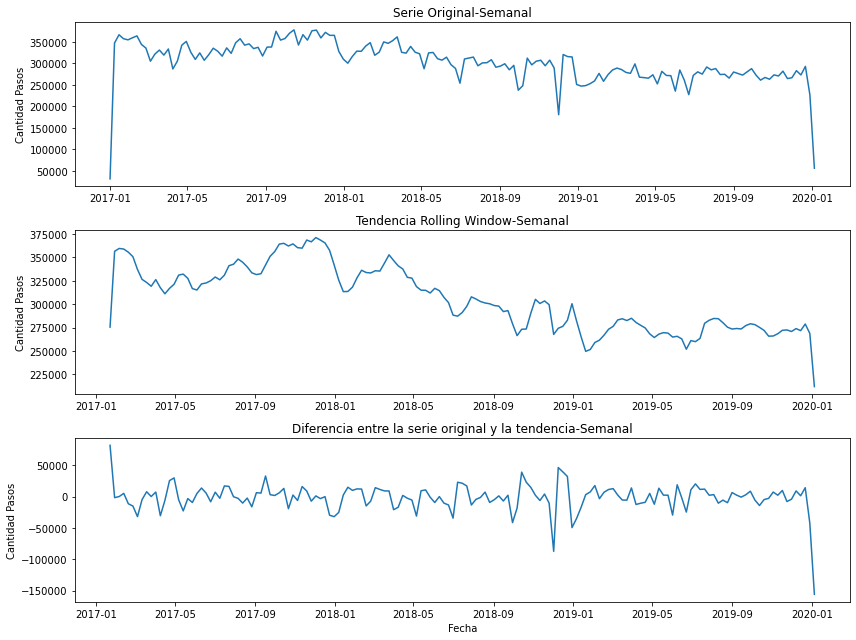

In [54]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original-Semanal')
plt.plot(semana.index, semana.cantidad_pasos)
plt.ylabel('Cantidad Pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window-Semanal')
plt.plot(semana.semana_promedio)
# plt.plot(semanal_promedio_tendencia)
plt.ylabel('Cantidad Pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia-Semanal')
plt.plot(semana.index, semana.cantidad_pasos - semana.semana_promedio)
plt.xlabel('Fecha')
plt.ylabel('Cantidad Pasos')

plt.tight_layout()
plt.show()

### Autocorrelación

In [57]:
!pip install statsmodels

  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)


In [76]:
from statsmodels.tsa.stattools import acf

nlags =  365*3-1
autocorr = acf(diario.cantidad_pasos, nlags = nlags)

In [77]:
autocorr.shape

(1095,)

Text(0.5, 0, 'lag')

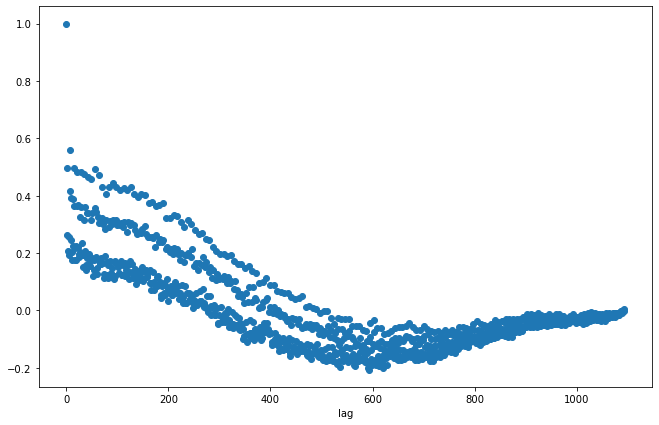

In [79]:
plt.figure(figsize = (11,7))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

In [80]:
from statsmodels.graphics.tsaplots import plot_acf

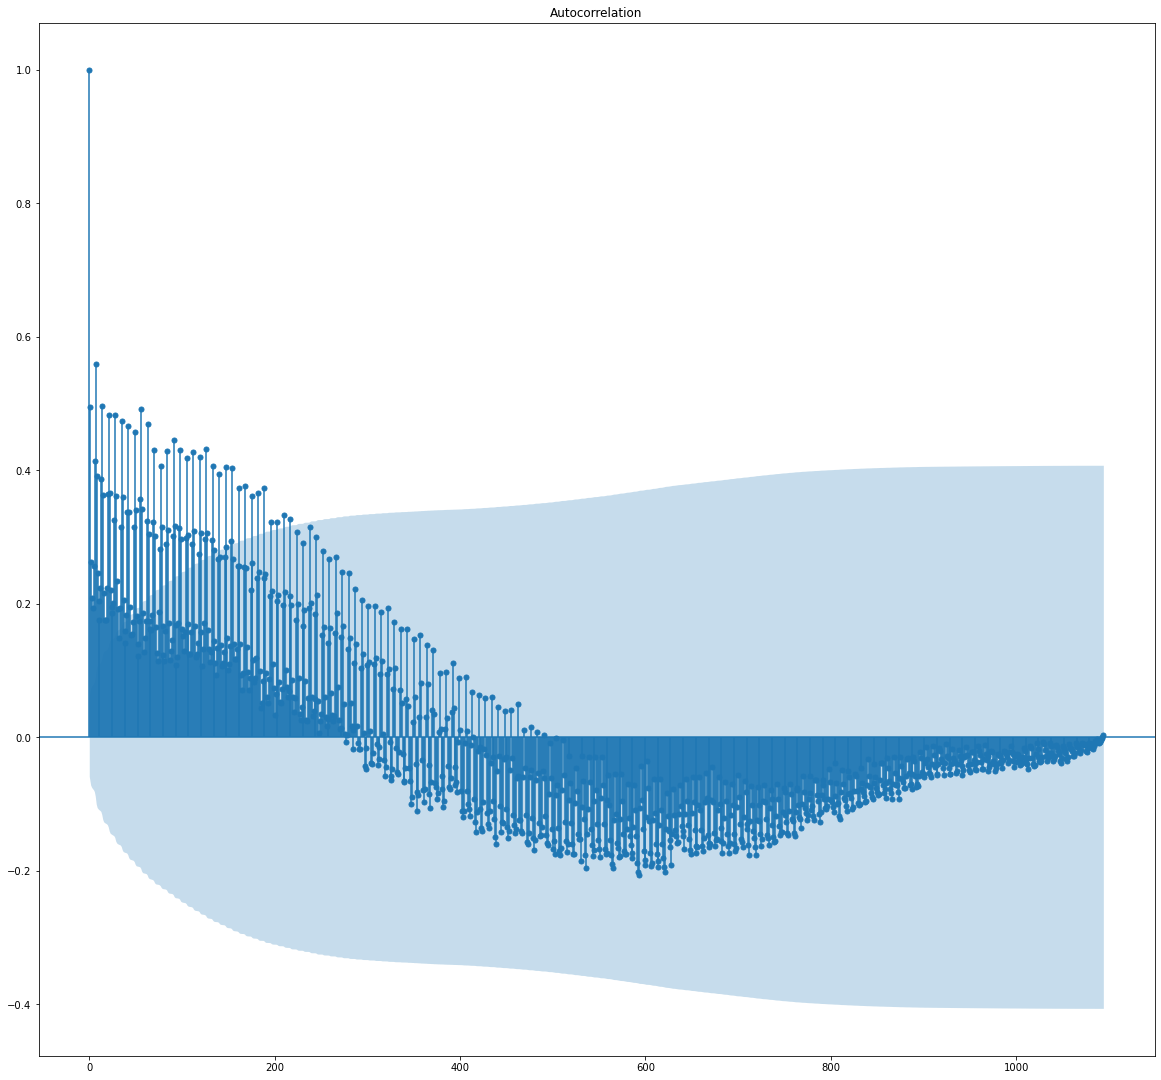

In [82]:
plot_acf(diario.cantidad_pasos, lags = 365*3-1)
plt.show()

De acuerdo a lo anterior observamos que la serie no esta autocorrelacionada

#### Probamos con Statsmodels con un modelo aditivo

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')


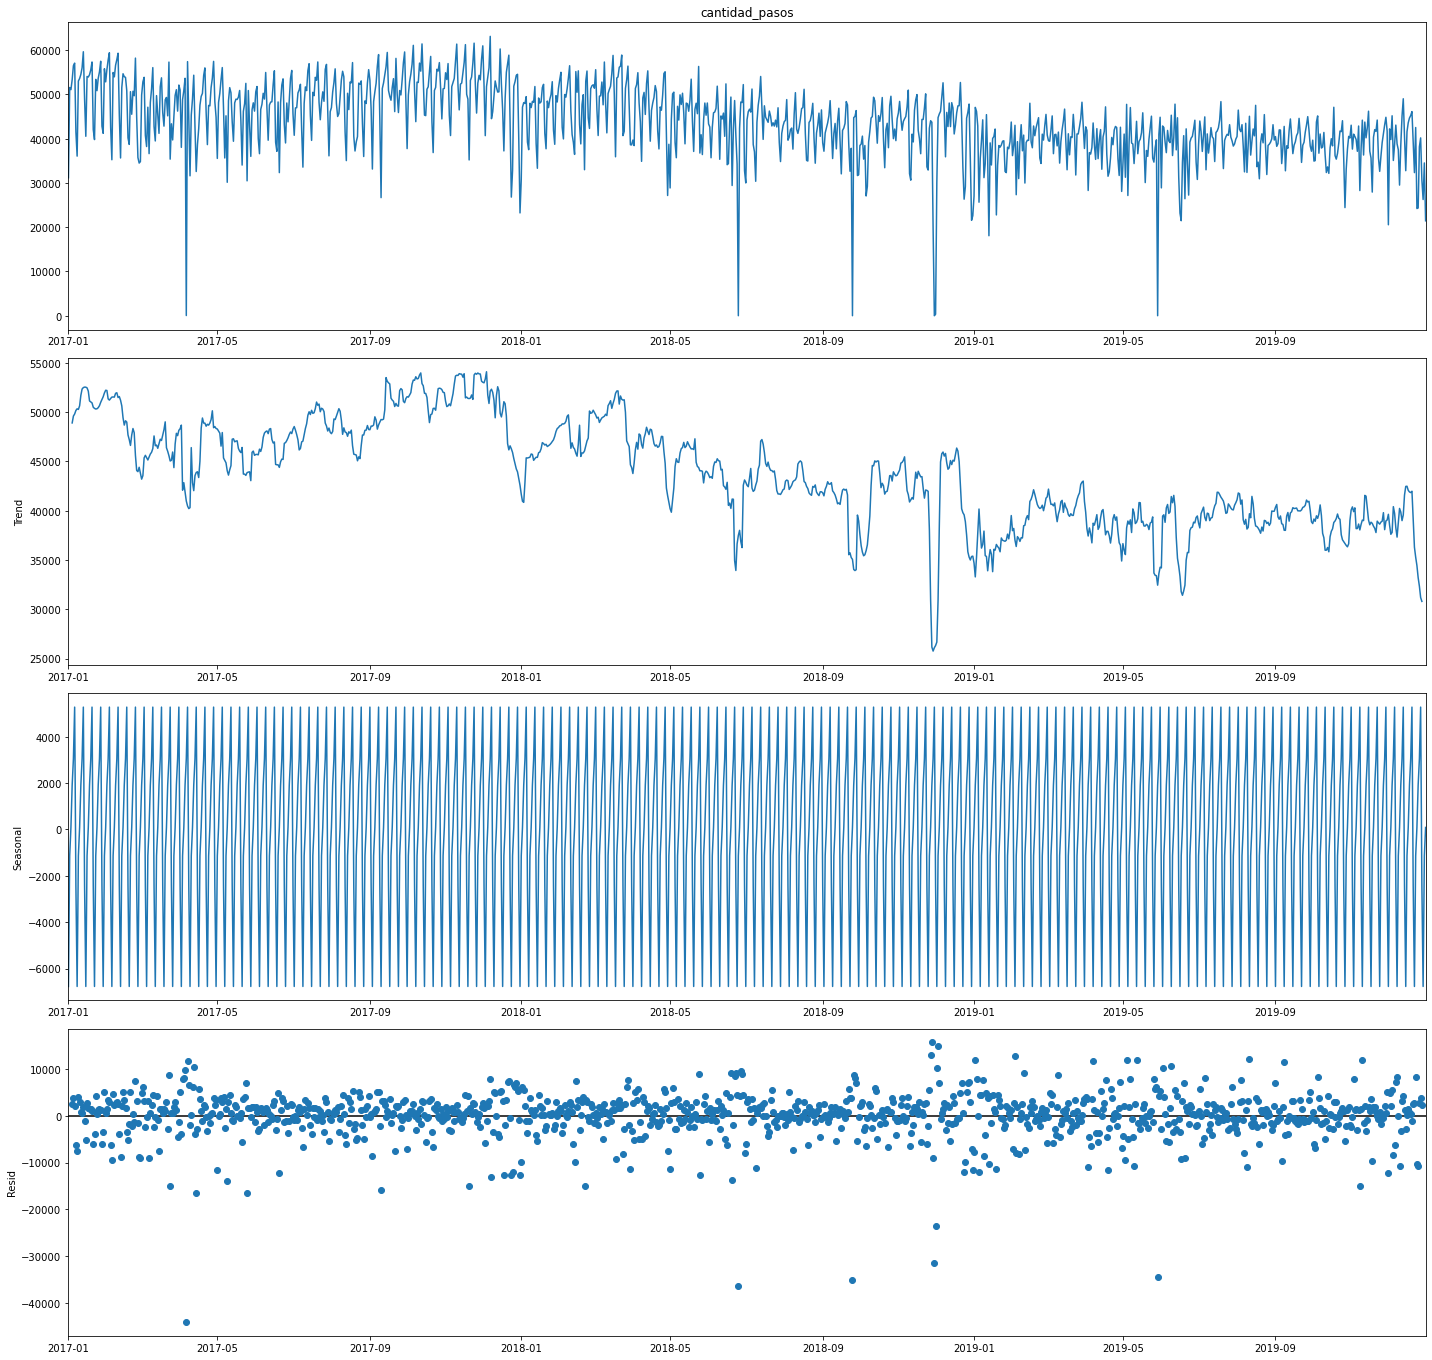

In [68]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20,19]
result.plot()
plt.show()

In [69]:
#Semanal
result_S = seasonal_decompose(semana.cantidad_pasos, model='additive')

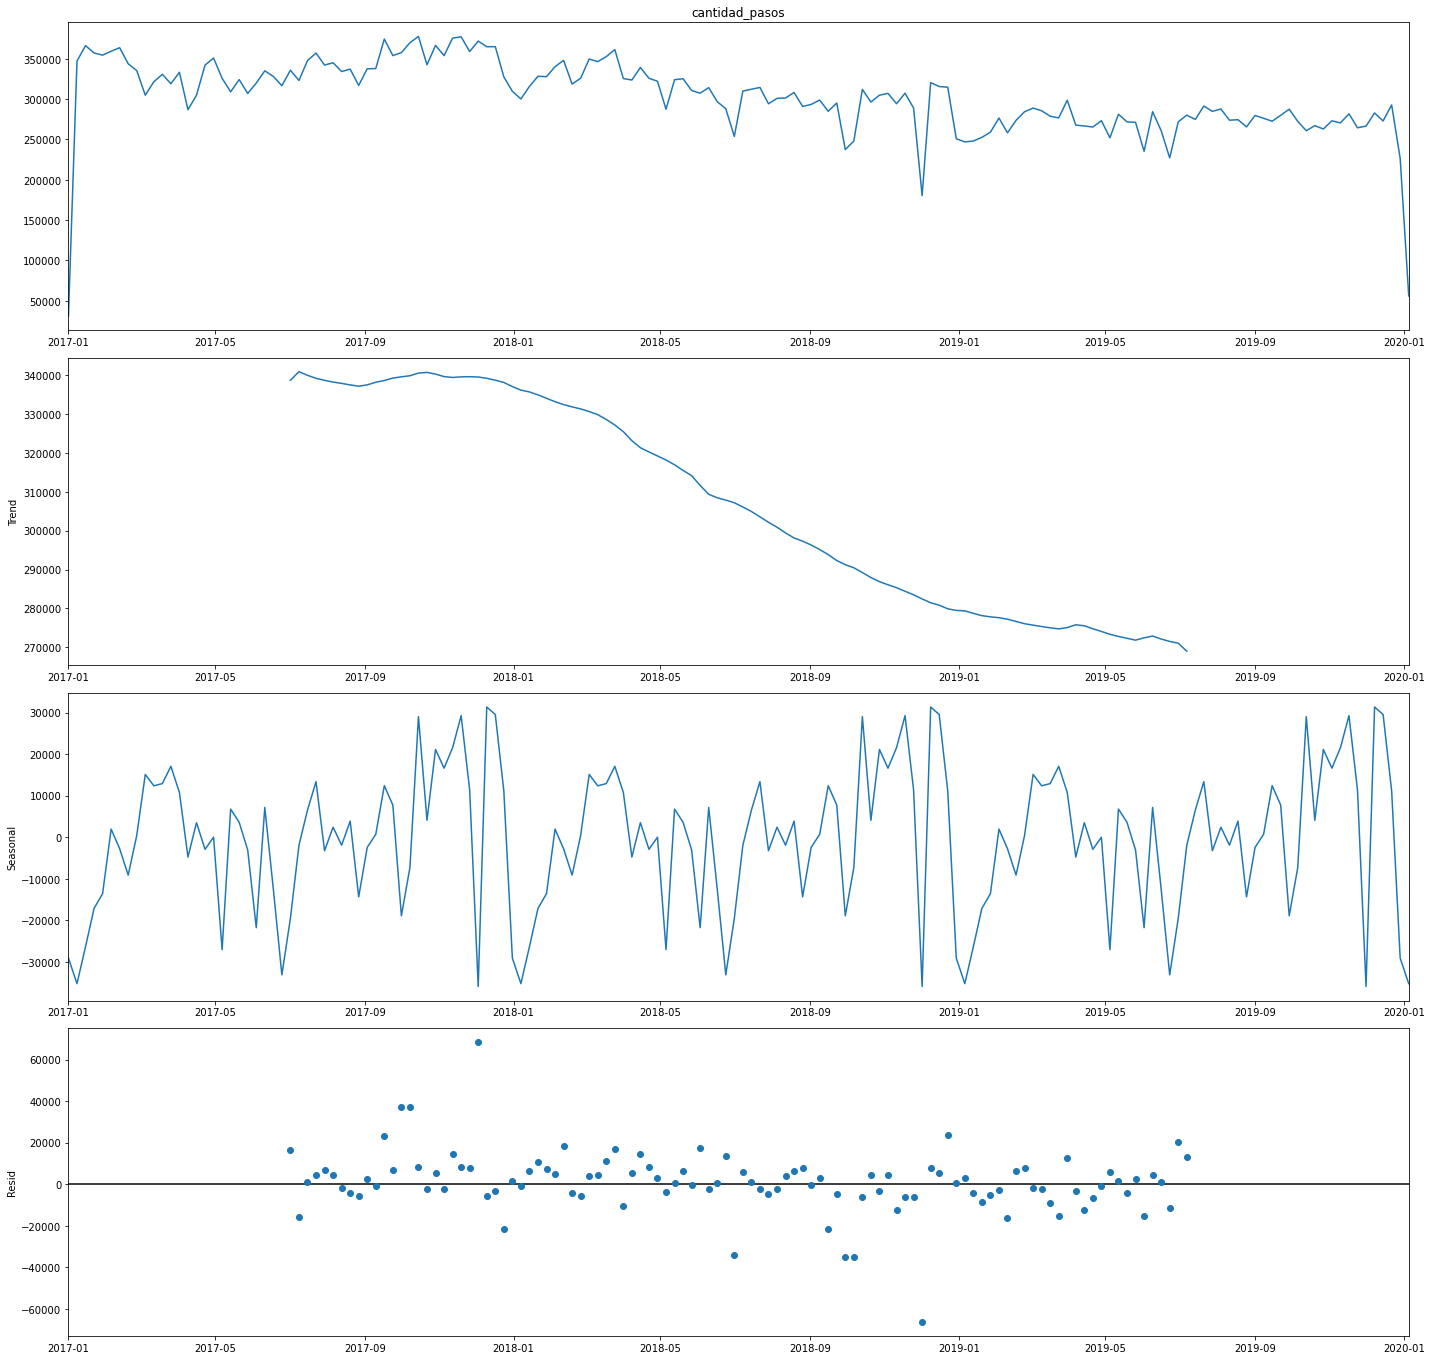

In [70]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20,19]
result_S.plot()
plt.show()

De acuerdo a los componentes vistos, podemos decir que la serie de tiempo presenta una tendencia a la baja y con estacionalidad mensual

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Tomamos el dataset con unicamente forma de pago "Efectivo" y estación "IlLia"

In [83]:
print(datasetF1.info())
datasetF1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   periodo         238869 non-null  int64         
 1   fecha           238869 non-null  object        
 2   hora_fin        238869 non-null  int64         
 3   dia             238869 non-null  object        
 4   sentido         238869 non-null  object        
 5   tipo_vehiculo   238869 non-null  object        
 6   cantidad_pasos  238869 non-null  int64         
 7   Fecha_C         238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 14.6+ MB
None


,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha_C
0,2017,2017-01-01,0,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
1,2017,2017-01-01,0,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
2,2017,2017-01-01,0,Domingo,Provincia,Pesado,2,2017-01-01 00:00:00
3,2017,2017-01-01,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
4,2017,2017-01-01,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...
238864,2019,2019-12-31,22,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238865,2019,2019-12-31,22,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238866,2019,2019-12-31,22,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238867,2019,2019-12-31,23,Martes,Provincia,Liviano,190,2019-12-31 23:00:00


In [84]:
#Eliminamos las columnas que no ocuparemos
datasetF1.drop(columns=["hora_fin","fecha","sentido", "tipo_vehiculo"],inplace=True)

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
dataset2=datasetF1

In [86]:
print(dataset2.info())
dataset2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   periodo         238869 non-null  int64         
 1   dia             238869 non-null  object        
 2   cantidad_pasos  238869 non-null  int64         
 3   Fecha_C         238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.3+ MB
None


,periodo,dia,cantidad_pasos,Fecha_C
0,2017,Domingo,9,2017-01-01 00:00:00
1,2017,Domingo,644,2017-01-01 00:00:00
2,2017,Domingo,2,2017-01-01 00:00:00
3,2017,Domingo,1,2017-01-01 00:00:00
4,2017,Domingo,1,2017-01-01 00:00:00
...,...,...,...,...
238864,2019,Martes,580,2019-12-31 22:00:00
238865,2019,Martes,556,2019-12-31 22:00:00
238866,2019,Martes,1,2019-12-31 22:00:00
238867,2019,Martes,190,2019-12-31 23:00:00


Cambiamos el dataset a una frecuencia diaria para proceder con el modelo de predicción

In [87]:
# DModel=dataset2.groupby([pd.Grouper(key="Fecha_C", freq="d"),"periodo","dia_Domingo", "dia_Jueves",
#                           "dia_Lunes","dia_Martes","dia_Miércoles","dia_Sábado","dia_Viernes"]).sum().reset_index()

DModel=dataset2.groupby([pd.Grouper(key="Fecha_C", freq="d"),"periodo","dia"]).sum().reset_index()
print(DModel.info())
DModel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha_C         1091 non-null   datetime64[ns]
 1   periodo         1091 non-null   int64         
 2   dia             1091 non-null   object        
 3   cantidad_pasos  1091 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 34.2+ KB
None


,Fecha_C,periodo,dia,cantidad_pasos
0,2017-01-01,2017,Domingo,31183
1,2017-01-02,2017,Lunes,51568
2,2017-01-03,2017,Martes,51093
3,2017-01-04,2017,Miércoles,53332
4,2017-01-05,2017,Jueves,56486
...,...,...,...,...
1086,2019-12-27,2019,Viernes,40182
1087,2019-12-28,2019,Sábado,30681
1088,2019-12-29,2019,Domingo,26259
1089,2019-12-30,2019,Lunes,34523


In [91]:
DModel["Fecha"]=DModel.Fecha_C

In [88]:
#Creamos un dataset con el rango de fechas de 2017 a 2019 con fecuencia diaria para ver que en nuestro dataset no existan días faltantes
AllDates=pd.date_range(start='2017-01-01', end='2019-12-31',freq='D').to_frame().rename(columns={0:"Fecha"})

In [89]:
print(AllDates.info())
AllDates

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2017-01-01 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   1095 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.1 KB
None


,Fecha
2017-01-01,2017-01-01
2017-01-02,2017-01-02
2017-01-03,2017-01-03
2017-01-04,2017-01-04
2017-01-05,2017-01-05
...,...
2019-12-27,2019-12-27
2019-12-28,2019-12-28
2019-12-29,2019-12-29
2019-12-30,2019-12-30


De acuerdo a lo anterior podemos ver que nuestro dataset tiene 1091 filas, por lo que tenemos 4 días faltantes

In [104]:
#Uniremos nuestro dataset con el generado "AllDates"
DatesValidation=AllDates.merge(DModel, on="Fecha", how="left")
print(DatesValidation.info())
DatesValidation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           1095 non-null   datetime64[ns]
 1   Fecha_C         1091 non-null   datetime64[ns]
 2   periodo         1091 non-null   float64       
 3   dia             1091 non-null   object        
 4   cantidad_pasos  1091 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 51.3+ KB
None


,Fecha,Fecha_C,periodo,dia,cantidad_pasos
0,2017-01-01,2017-01-01,2017.0,Domingo,31183.0
1,2017-01-02,2017-01-02,2017.0,Lunes,51568.0
2,2017-01-03,2017-01-03,2017.0,Martes,51093.0
3,2017-01-04,2017-01-04,2017.0,Miércoles,53332.0
4,2017-01-05,2017-01-05,2017.0,Jueves,56486.0
...,...,...,...,...,...
1090,2019-12-27,2019-12-27,2019.0,Viernes,40182.0
1091,2019-12-28,2019-12-28,2019.0,Sábado,30681.0
1092,2019-12-29,2019-12-29,2019.0,Domingo,26259.0
1093,2019-12-30,2019-12-30,2019.0,Lunes,34523.0


In [105]:
#Visualizamos cuantos filas/días tienen valores nulos
DatesValidation.isna().sum()

Fecha             0
Fecha_C           4
periodo           4
dia               4
cantidad_pasos    4
dtype: int64

In [106]:
VFaltantes=DatesValidation[DatesValidation.cantidad_pasos.isna()].index
VFaltantes

Int64Index([540, 632, 698, 878], dtype='int64')

In [107]:
DatesValidation.iloc[VFaltantes]

,Fecha,Fecha_C,periodo,dia,cantidad_pasos
540,2018-06-25,NaT,NaN,NaN,NaN
632,2018-09-25,NaT,NaN,NaN,NaN
698,2018-11-30,NaT,NaN,NaN,NaN
878,2019-05-29,NaT,NaN,NaN,NaN


Remplazaremos loa valores nulos por lo correctos y dejando 0 en la cantidad de pasos, ya que no se trata de valores perdidos

In [108]:
DatesValidation.cantidad_pasos.iloc[VFaltantes]=\
DatesValidation.cantidad_pasos.iloc[VFaltantes].replace(np.nan, 0)

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [109]:
DatesValidation.periodo.iloc[VFaltantes]=\
DatesValidation.Fecha.iloc[VFaltantes].dt.year

In [110]:
DatesValidation.dia.iloc[VFaltantes]=\
DatesValidation.Fecha.iloc[VFaltantes].dt.weekday

In [111]:
DatesValidation.dia.iloc[VFaltantes] = DatesValidation.dia.iloc[VFaltantes]\
        .replace({0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'})

In [112]:
DatesValidation.iloc[VFaltantes]

,Fecha,Fecha_C,periodo,dia,cantidad_pasos
540,2018-06-25,NaT,2018.0,Lunes,0.0
632,2018-09-25,NaT,2018.0,Martes,0.0
698,2018-11-30,NaT,2018.0,Viernes,0.0
878,2019-05-29,NaT,2019.0,Miércoles,0.0


In [113]:
DatesValidation.drop(columns=["Fecha_C"],inplace=True)
DatesValidation[["periodo","cantidad_pasos"]]=DatesValidation[["periodo","cantidad_pasos"]].astype(int)
print(DatesValidation.info())
DatesValidation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           1095 non-null   datetime64[ns]
 1   periodo         1095 non-null   int32         
 2   dia             1095 non-null   object        
 3   cantidad_pasos  1095 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 34.2+ KB
None


,Fecha,periodo,dia,cantidad_pasos
0,2017-01-01,2017,Domingo,31183
1,2017-01-02,2017,Lunes,51568
2,2017-01-03,2017,Martes,51093
3,2017-01-04,2017,Miércoles,53332
4,2017-01-05,2017,Jueves,56486
...,...,...,...,...
1090,2019-12-27,2019,Viernes,40182
1091,2019-12-28,2019,Sábado,30681
1092,2019-12-29,2019,Domingo,26259
1093,2019-12-30,2019,Lunes,34523


In [114]:
#Creamos valores dummies para la columna día y poder ocuparlos dentro de los modelos a ocupar
DatesValidation=pd.get_dummies(DatesValidation, columns=["dia"])
DModel=DatesValidation
DModel

,Fecha,periodo,cantidad_pasos,dia_Domingo,dia_Jueves,dia_Lunes,dia_Martes,dia_Miércoles,dia_Sábado,dia_Viernes
0,2017-01-01,2017,31183,1,0,0,0,0,0,0
1,2017-01-02,2017,51568,0,0,1,0,0,0,0
2,2017-01-03,2017,51093,0,0,0,1,0,0,0
3,2017-01-04,2017,53332,0,0,0,0,1,0,0
4,2017-01-05,2017,56486,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1090,2019-12-27,2019,40182,0,0,0,0,0,0,1
1091,2019-12-28,2019,30681,0,0,0,0,0,1,0
1092,2019-12-29,2019,26259,1,0,0,0,0,0,0
1093,2019-12-30,2019,34523,0,0,1,0,0,0,0


In [115]:
#Crearemos una columa de fecha con formato númerico para poderla ocupar con los modelos de machine learning que ocuparemos
DModel['Fecha_Num']=DModel.Fecha.map(datetime.datetime.toordinal)
DModel

,Fecha,periodo,cantidad_pasos,dia_Domingo,dia_Jueves,dia_Lunes,dia_Martes,dia_Miércoles,dia_Sábado,dia_Viernes,Fecha_Num
0,2017-01-01,2017,31183,1,0,0,0,0,0,0,736330
1,2017-01-02,2017,51568,0,0,1,0,0,0,0,736331
2,2017-01-03,2017,51093,0,0,0,1,0,0,0,736332
3,2017-01-04,2017,53332,0,0,0,0,1,0,0,736333
4,2017-01-05,2017,56486,0,1,0,0,0,0,0,736334
...,...,...,...,...,...,...,...,...,...,...,...
1090,2019-12-27,2019,40182,0,0,0,0,0,0,1,737420
1091,2019-12-28,2019,30681,0,0,0,0,0,1,0,737421
1092,2019-12-29,2019,26259,1,0,0,0,0,0,0,737422
1093,2019-12-30,2019,34523,0,0,1,0,0,0,0,737423


In [307]:
# Guardamos el dataset para no iniciar desde el inicio
DModel.to_csv("Project3.1", index=False) 

In [117]:
DModel=pd.read_csv("Project3.1")

In [118]:
DModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fecha           1095 non-null   object
 1   periodo         1095 non-null   int64 
 2   cantidad_pasos  1095 non-null   int64 
 3   dia_Domingo     1095 non-null   int64 
 4   dia_Jueves      1095 non-null   int64 
 5   dia_Lunes       1095 non-null   int64 
 6   dia_Martes      1095 non-null   int64 
 7   dia_Miércoles   1095 non-null   int64 
 8   dia_Sábado      1095 non-null   int64 
 9   dia_Viernes     1095 non-null   int64 
 10  Fecha_Num       1095 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 94.2+ KB


In [119]:
DModel.Fecha=pd.to_datetime(DModel.Fecha)

In [120]:
#Indexamos la columna Fecha
DModel.set_index("Fecha",inplace=True)

# Parte B
## Modelo de Machine learning

#### Definimos y dividimos los datos en train y test

In [121]:
DTest=DModel.loc["2019-10-01":"2019-12-31"]
DTrain=DModel.loc["2017-01-01":"2019-09-30"]

In [122]:
Xtrain=DModel.loc["2017-01-01":"2019-09-30"]
# X = data2.drop(['price'],axis=1)
ytrain=Xtrain.cantidad_pasos

Xtest=DModel.loc["2019-10-01":"2019-12-31"]
ytest=Xtest.cantidad_pasos

In [123]:
Xtrain=Xtrain.drop(["cantidad_pasos"],axis=1)
Xtest=Xtest.drop(["cantidad_pasos"],axis=1)

In [182]:
Xtrain=Xtrain.values.reshape(-1,1)
Xtest=Xtest.values.reshape(-1,1)

In [183]:
ytrain=ytrain.values.reshape(-1,1)
ytest=ytest.values.reshape(-1,1)

## Metrica
#### De acuerdo al tipo de modelo que realizaremos, probaremos las siguientes metricas para regresión:

- Error cuadrático medio (RMSE)
- R al cuadrado (R²)
- Error porcentual absoluto medio (MAPE)
- Error absoluto medio (MAE)

In [124]:
#Importamos las metricas que ocuparemos para el modelo de Benchmark
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error


https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac

In [125]:
#Importamos los modelos que ocuparemos 
#Benchmark
from sklearn.linear_model import LinearRegression

In [126]:
#Modelos con los que optimizaremos hiperparametros
import xgboost as xgb
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [127]:
#Intanciamos el modelo de Benchmark que probaremos
lr=LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

Modelo Benchmar: Regresión Lineal
RMSE en train: 6087.670340600261
RMSE en Test: 5303.237514335829
R2 en train: 0.44777870098671346
R2 en Test: 0.15431979199645907
MAPE en train: 7.869670033167335e+19
MAPE en Test: 11.4
MAE en train: 3903.8121739344456
MAE en Test: 3858.542672455898


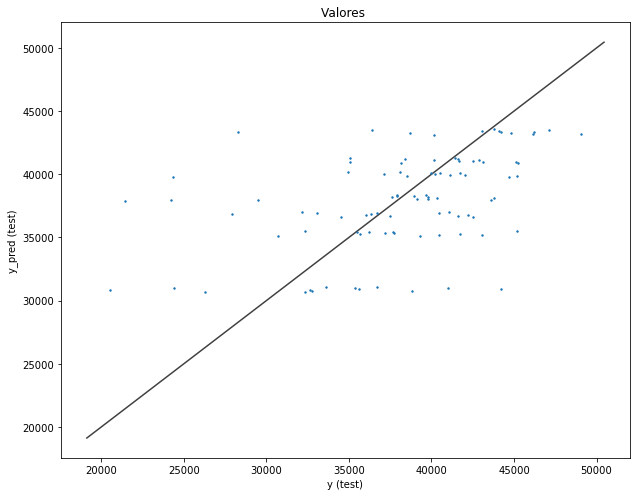

In [128]:
#Modelo de Benchmark

#Predecimos y graficamos el modelo
modelos = ['Regresión Lineal']

for i, model in enumerate([lr]):
    y_train_pred = model.predict(Xtrain)
    y_test_pred = model.predict(Xtest)
    
    
    print(f'Modelo Benchmar: {modelos[i]}')

    RMSE_train =mean_squared_error(ytrain, y_train_pred,squared=False)
    RMSE_test = mean_squared_error(ytest, y_test_pred,squared=False)
    print(f'RMSE en train: {RMSE_train}')
    print(f'RMSE en Test: {RMSE_test}')
    
    r2_train =r2_score(ytrain, y_train_pred)
    r2_test = r2_score(ytest, y_test_pred)
    print(f'R2 en train: {r2_train}')
    print(f'R2 en Test: {r2_test}')
    
    MAPE_train =round(100*mean_absolute_percentage_error(ytrain, y_train_pred),2)
    MAPE_test = round(100*mean_absolute_percentage_error(ytest, y_test_pred),2)
    print(f'MAPE en train: {MAPE_train}')
    print(f'MAPE en Test: {MAPE_test}')
    
    
    MAE_train =mean_absolute_error(ytrain, y_train_pred)
    MAE_test = mean_absolute_error(ytest, y_test_pred)
    print(f'MAE en train: {MAE_train}')
    print(f'MAE en Test: {MAE_test}')
    
    
    
    plt.figure(figsize = (17,7))

    ax = plt.subplot(1,2,2)
    ax.scatter(ytest,y_test_pred, s =2)
#     ax.scatter(RMSE_test,RMSE_train, s =2)
    plt.title('Valores ')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

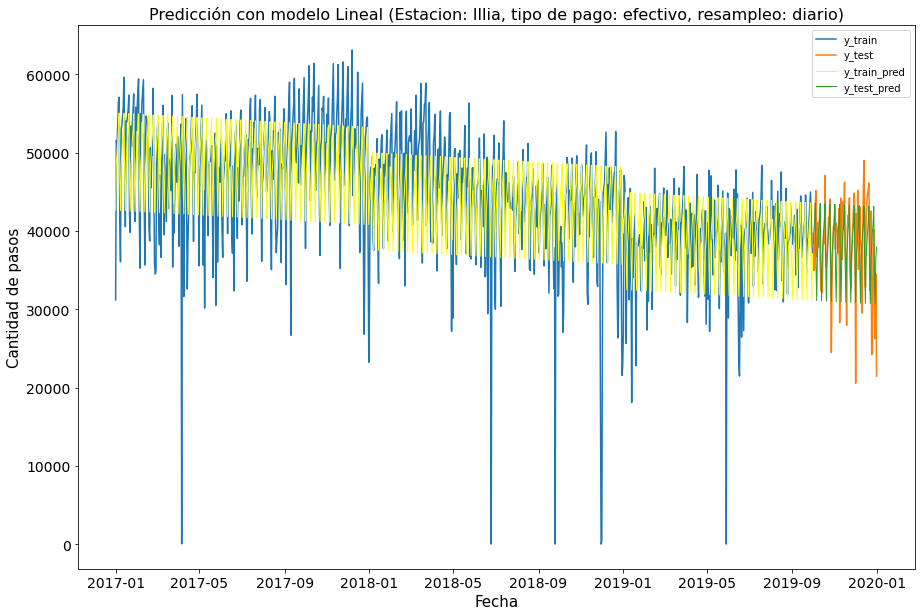

In [129]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(DTrain.index, DTrain.cantidad_pasos, label = 'y_train')
plt.plot(DTest.index, DTest.cantidad_pasos, label = 'y_test')
plt.plot(DTrain.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 1)
plt.plot(DTest.index, y_test_pred, label = 'y_test_pred',  lw = 1)
#Formato de la gráfica
plt.title('Predicción con modelo Lineal (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.legend()

## Empezaremos con el modelo XGboost


In [130]:
#Instanciamos el módelo XGboost
XGB = xgb.XGBRegressor()

In [131]:
XGB

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [ ]:
#Definimos los hiperparametros a optimizar

In [132]:
param= {"max_depht":np.arange(3,13,2),
        "learning_rate":np.linspace(.01, .3, 27),
        'seed': [42],
        "subsample": [0.85]    }
# "subsample": [0.85],

In [133]:
#Importamos Random Search para porbar los hiperparametros elegidos
from sklearn.model_selection import RandomizedSearchCV

In [134]:
XGB_ModeL=RandomizedSearchCV(XGB, param,n_iter=150, random_state=0, cv=3, verbose=True, n_jobs=-1,return_train_score=True)

In [135]:
XGB_ModeL.fit(Xtrain, ytrain,
        eval_set=[(Xtrain, ytrain), (Xtest, ytest)],
        early_stopping_rounds=70,
        verbose=True)

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 135 is smaller than n_iter=150. Running 135 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 135 candidates, totalling 405 fits
[19:32:12] WARNING: ..\src\learner.cc:573: 
Parameters: { "max_depht" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:33287.07031	validation_1-rmse:28175.30469
[1]	validation_0-rmse:24766.03516	validation_1-rmse:20859.99414
[2]	validation_0-rmse:18659.18555	validation_1-rmse:15356.41113
[3]	validation_0-rmse:14299.85254	validation_1-rmse:11632.35352
[4]	validation_0-rmse:11084.11719	validation_1-rmse:9077.12500
[5]	validation_0-rmse:8849.09277	validation_1-rmse:7415.44434
[6]	validation_0-rmse:7314.80762	validation_1-rmse:6326.63867
[7]	validation_0-rmse:6269.36035	validation_1-rmse:5767.17627
[8]	validation_0-rmse:5424.26709	validation_1-rmse:5501.56201
[9]	validation_0-rmse:5001.79688	valida

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                   param_distributions={'learning_rate': array([0.01      , 0.02115385, 0.03230769, 0.04346154, 0.05461538,
       0.06576923, 0.07692308, 0.08807692, 0.09923077, 0.11038462,

In [136]:
print("Mejores parametros: "+str(XGB_ModeL.best_params_))


Mejores parametros: {'subsample': 0.85, 'seed': 42, 'max_depht': 3, 'learning_rate': 0.2665384615384615}


In [137]:
#Definimos los modelos con  hiperparamtros encontrados derivado del RandomSearch
XGB_ModeL =xgb.XGBRegressor(subsample=.85,max_depht=3,learning_rate= 0.2665384615384615,seed=42)

In [138]:
XGB_ModeL.fit(Xtrain, ytrain)

[19:32:52] WARNING: ..\src\learner.cc:573: 
Parameters: { "max_depht" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2665384615384615, max_delta_step=0, max_depht=3,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=None)

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Modelo Benchmar: XGBoost
RMSE en train: 1365.607557320088
RMSE en Test: 5815.591404599671
R2 en train: 0.9722116523666
R2 en Test: -0.01697852514114162
MAPE en train: 8.32382285119143e+18
MAPE en Test: 12.84
MAE en train: 983.7280284390968
MAE en Test: 4065.5438179347825


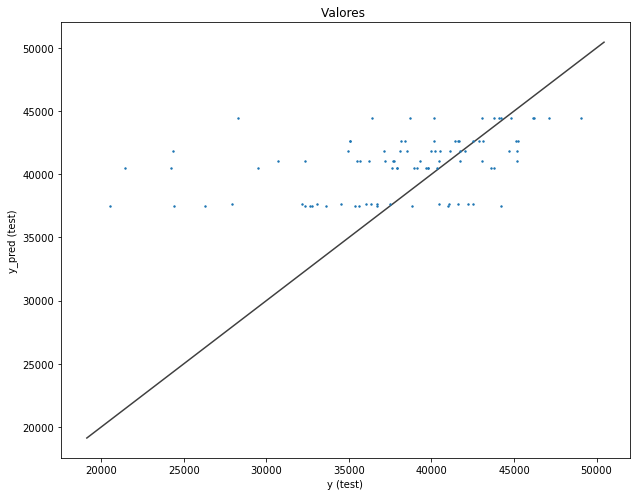

In [139]:
modelos = ['XGBoost']

for i, model in enumerate([XGB_ModeL]):
    y_train_pred = model.predict(Xtrain)
    y_test_pred = model.predict(Xtest)
    
    
    print(f'Modelo Benchmar: {modelos[i]}')

    RMSE_train =mean_squared_error(ytrain, y_train_pred,squared=False)
    RMSE_test = mean_squared_error(ytest, y_test_pred,squared=False)
    print(f'RMSE en train: {RMSE_train}')
    print(f'RMSE en Test: {RMSE_test}')
    
    r2_train =r2_score(ytrain, y_train_pred)
    r2_test = r2_score(ytest, y_test_pred)
    print(f'R2 en train: {r2_train}')
    print(f'R2 en Test: {r2_test}')
    
    MAPE_train =round(100*mean_absolute_percentage_error(ytrain, y_train_pred),2)
    MAPE_test = round(100*mean_absolute_percentage_error(ytest, y_test_pred),2)
    print(f'MAPE en train: {MAPE_train}')
    print(f'MAPE en Test: {MAPE_test}')
    
    
    MAE_train =mean_absolute_error(ytrain, y_train_pred)
    MAE_test = mean_absolute_error(ytest, y_test_pred)
    print(f'MAE en train: {MAE_train}')
    print(f'MAE en Test: {MAE_test}')
    
    
    
    plt.figure(figsize = (17,7))

    ax = plt.subplot(1,2,2)
    ax.scatter(ytest,y_test_pred, s =2)

    plt.title('Valores ')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

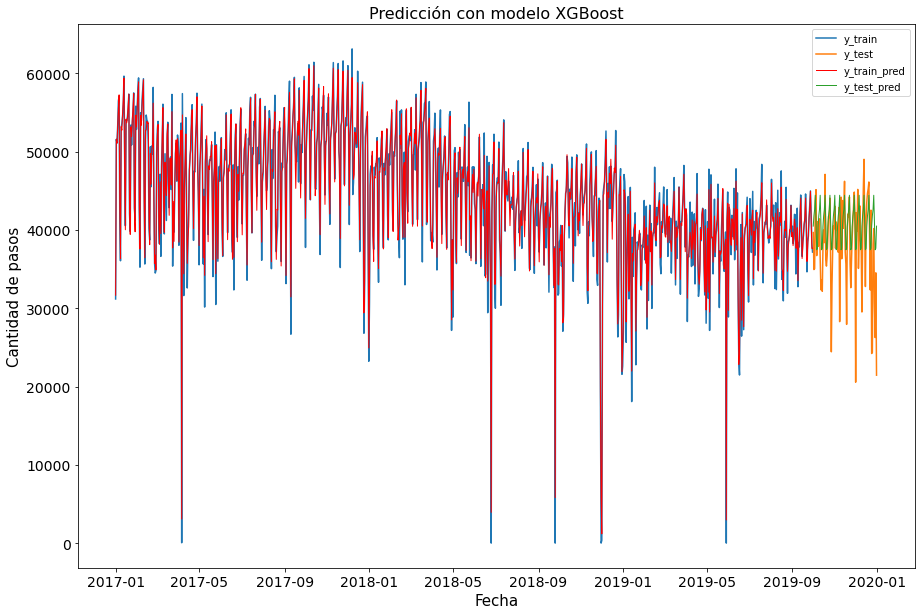

In [142]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(DTrain.index, DTrain.cantidad_pasos, label = 'y_train')
plt.plot(DTest.index, DTest.cantidad_pasos, label = 'y_test')
plt.plot(DTrain.index, y_train_pred, label = 'y_train_pred', color='red', lw = 1)
plt.plot(DTest.index, y_test_pred, label = 'y_test_pred',  lw = 1)
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.legend()

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


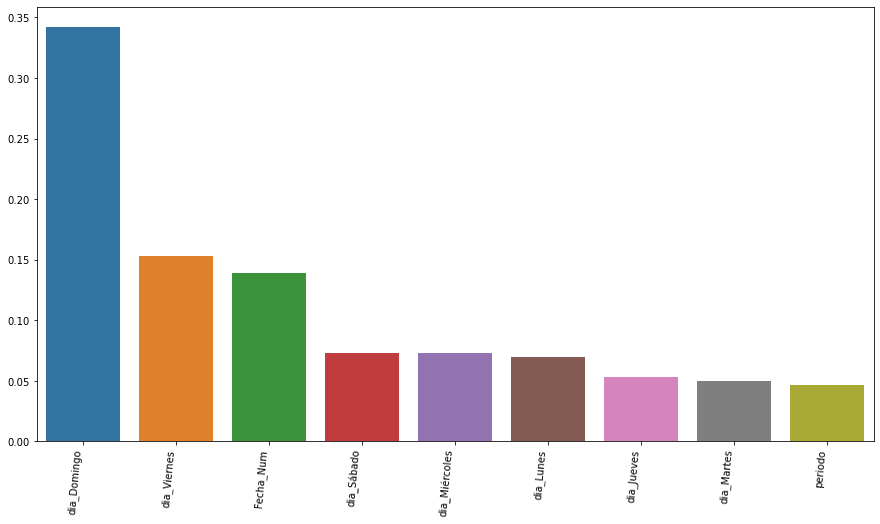

In [143]:
#Observaremos los features mas importantes del modelo

importances = XGB_ModeL.feature_importances_
columns = Xtrain.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
ax=sns.barplot(columns[indices], importances[indices], orient="v")
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.show()

## Ahora Probaremos con Prophet

In [184]:
#Instanciamos el modelo
Prophet_Model=Prophet()

Definiremos los set train y test con las caracteristicas requeridas por Prophet

In [185]:
Prophet_Train=DTrain.reset_index()
Prophet_Train.drop(columns=["periodo","dia_Domingo","dia_Jueves","dia_Lunes","dia_Martes","dia_Miércoles","dia_Sábado","dia_Viernes","Fecha_Num"],inplace=True)
Prophet_Train.rename(columns={'Fecha':'ds', 'cantidad_pasos':'y'},inplace=True)
Prophet_Train

,ds,y
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486
...,...,...
998,2019-09-26,43110
999,2019-09-27,44985
1000,2019-09-28,41925
1001,2019-09-29,38348


In [186]:
Prophet_Test=DTest.reset_index()
Prophet_Test.drop(columns=["periodo","dia_Domingo","dia_Jueves","dia_Lunes","dia_Martes","dia_Miércoles","dia_Sábado","dia_Viernes","Fecha_Num"],inplace=True)
Prophet_Test.rename(columns={'Fecha':'ds', 'cantidad_pasos':'y'},inplace=True)
print(Prophet_Test.info())
Prophet_Test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      92 non-null     datetime64[ns]
 1   y       92 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB
None


,ds,y
0,2019-10-01,39669
1,2019-10-02,34943
2,2019-10-03,35054
3,2019-10-04,43775
4,2019-10-05,45150
...,...,...
87,2019-12-27,40182
88,2019-12-28,30681
89,2019-12-29,26259
90,2019-12-30,34523


In [187]:
DataProphet=pd.concat([Prophet_Train,Prophet_Test])
DataProphet.reset_index(drop=True, inplace=True)
DataProphet

,ds,y
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486
...,...,...
1090,2019-12-27,40182
1091,2019-12-28,30681
1092,2019-12-29,26259
1093,2019-12-30,34523


In [188]:
#Entrenaremos el modelo con el set de entrenamiento
Prophet_Model.fit(Prophet_Train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [189]:
P_MTrain=Prophet_Model.predict(Prophet_Train)[['ds','yhat']]
P_MTrain

,ds,yhat
0,2017-01-01,39320.926212
1,2017-01-02,45088.755791
2,2017-01-03,46242.746410
3,2017-01-04,48018.014647
4,2017-01-05,49057.929123
...,...,...
998,2019-09-26,42903.246029
999,2019-09-27,45168.564971
1000,2019-09-28,37153.474919
1001,2019-09-29,32741.680531


In [190]:
P_MTest=Prophet_Model.predict(Prophet_Test)[['ds']]
P_MTest

,ds
0,2019-10-01
1,2019-10-02
2,2019-10-03
3,2019-10-04
4,2019-10-05
...,...
87,2019-12-27
88,2019-12-28
89,2019-12-29
90,2019-12-30


In [191]:
forecast=Prophet_Model.predict(P_MTest)

In [192]:
y_test=Prophet_Test["y"].values
y_pred=forecast['yhat'].values

In [193]:
RMSE=mean_squared_error(y_test, y_pred,squared=False)
R2=r2_score(y_test, y_pred)
MAPE=mean_absolute_percentage_error(y_test, y_pred)*100
MAE=mean_absolute_error(y_test, y_pred)

In [194]:
print('RMSE: %.3f' % RMSE)
print('R2: %.3f' % R2)
print('MAPE: %.3f' % MAPE)
print('MAE: %.3f' % MAE)

RMSE: 5854.658
R2: -0.031
MAPE: 13.024
MAE: 4270.093


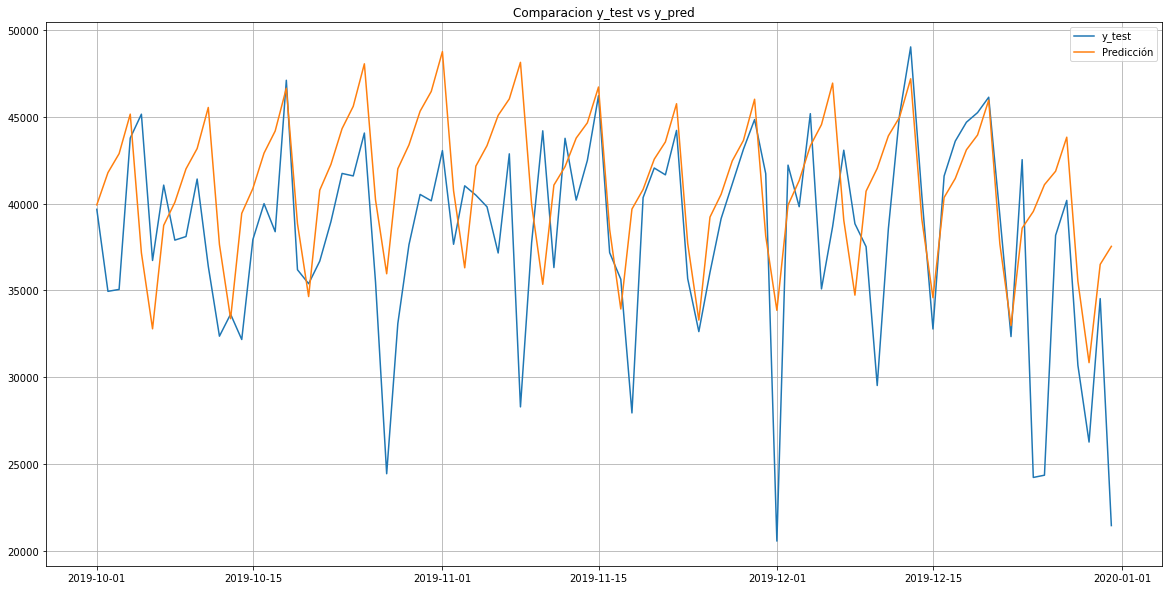

In [201]:
#Graficamos 
plt.figure(figsize=(20,10))
plt.plot(Prophet_Test.ds, y_test, label='y_test')
plt.plot(Prophet_Test.ds, y_pred, label='Predicción')
plt.title("Comparacion y_test vs y_pred")
plt.grid()
plt.legend()
plt.show()


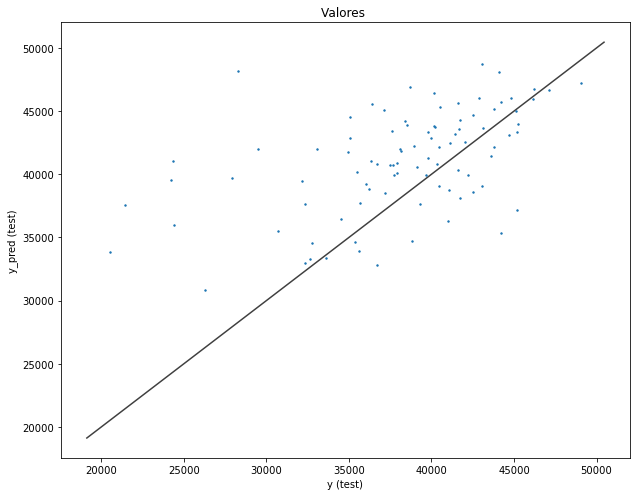

In [203]:
plt.figure(figsize = (17,7))
ax = plt.subplot(1,2,2)
ax.scatter(ytest,y_pred, s =2)
plt.title('Valores ')
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

## Ahora predecimos 2020 con Prophet

In [172]:
Prophet20=pd.concat([Prophet_Train,Prophet_Test])
Prophet20.reset_index(drop=True, inplace = True)
Prophet20

,ds,y
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486
...,...,...
1090,2019-12-27,40182
1091,2019-12-28,30681
1092,2019-12-29,26259
1093,2019-12-30,34523


In [173]:
P_model =Prophet()

In [174]:
P_model.fit(Prophet20)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [175]:
future=P_model.make_future_dataframe(periods=366)
future.tail()

,ds
1456,2020-12-27
1457,2020-12-28
1458,2020-12-29
1459,2020-12-30
1460,2020-12-31


In [176]:
forecast = P_model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,48904.328644,31745.269178,46162.590143,48904.328644,48904.328644,-9838.114041,-9838.114041,-9838.114041,-6826.534011,-6826.534011,-6826.534011,-3011.580031,-3011.580031,-3011.580031,0.0,0.0,0.0,39066.214603
1,2017-01-02,48903.472430,37335.962179,52110.875416,48903.472430,48903.472430,-4248.277828,-4248.277828,-4248.277828,-1086.745399,-1086.745399,-1086.745399,-3161.532430,-3161.532430,-3161.532430,0.0,0.0,0.0,44655.194602
2,2017-01-03,48902.616217,38612.987689,52887.137501,48902.616217,48902.616217,-3237.932028,-3237.932028,-3237.932028,33.726251,33.726251,33.726251,-3271.658279,-3271.658279,-3271.658279,0.0,0.0,0.0,45664.684189
3,2017-01-04,48901.760004,41100.328867,55599.083667,48901.760004,48901.760004,-1409.333571,-1409.333571,-1409.333571,1931.610463,1931.610463,1931.610463,-3340.944034,-3340.944034,-3340.944034,0.0,0.0,0.0,47492.426433
4,2017-01-05,48900.903790,41778.289054,55525.346890,48900.903790,48900.903790,-295.398494,-295.398494,-295.398494,3073.710532,3073.710532,3073.710532,-3369.109026,-3369.109026,-3369.109026,0.0,0.0,0.0,48605.505296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2020-12-27,34607.309110,18287.082112,33230.594979,32671.458483,36522.164724,-8575.291024,-8575.291024,-8575.291024,-6826.534011,-6826.534011,-6826.534011,-1748.757014,-1748.757014,-1748.757014,0.0,0.0,0.0,26032.018085
1457,2020-12-28,34600.083596,24047.058009,39975.742399,32656.592531,36524.793266,-3145.230719,-3145.230719,-3145.230719,-1086.745399,-1086.745399,-1086.745399,-2058.485320,-2058.485320,-2058.485320,0.0,0.0,0.0,31454.852877
1458,2020-12-29,34592.858082,24576.997763,40054.532340,32641.726579,36527.159589,-2309.866901,-2309.866901,-2309.866901,33.726251,33.726251,33.726251,-2343.593152,-2343.593152,-2343.593152,0.0,0.0,0.0,32282.991182
1459,2020-12-30,34585.632569,26363.765699,41331.300581,32625.198065,36527.641272,-668.233796,-668.233796,-668.233796,1931.610463,1931.610463,1931.610463,-2599.844259,-2599.844259,-2599.844259,0.0,0.0,0.0,33917.398773


In [178]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1456,2020-12-27,26032.018085,18287.082112,33230.594979
1457,2020-12-28,31454.852877,24047.058009,39975.742399
1458,2020-12-29,32282.991182,24576.997763,40054.532340
1459,2020-12-30,33917.398773,26363.765699,41331.300581
1460,2020-12-31,34828.579129,27115.503043,42626.922865


<Figure size 1080x720 with 0 Axes>

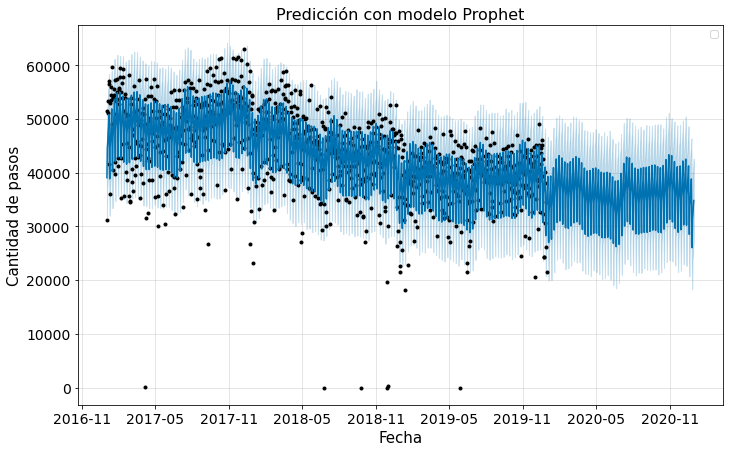

In [179]:
plt.figure(figsize = (15,10))
P_model.plot(forecast)
plt.title('Predicción con modelo Prophet',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend()

In [180]:
y_test_pred=forecast.yhat.values

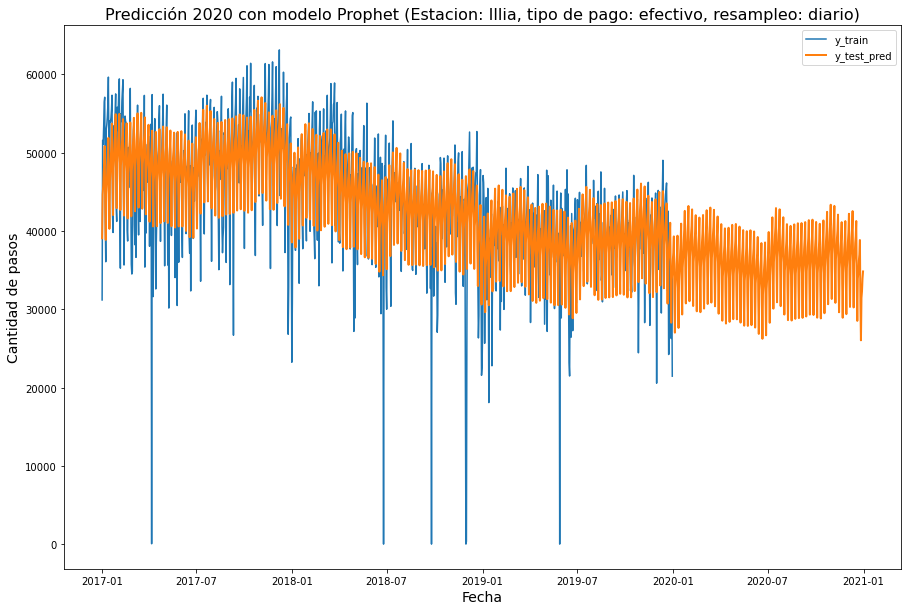

In [181]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(Prophet20.ds, Prophet20.y, label = 'y_train')
plt.plot(future.ds, y_test_pred, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción 2020 con modelo Prophet (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.legend()

## Parte C Investigación

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

- Se puede incluir información referente al tipo de vehículo, forma de pago y sentido con el metodo pd.grouper() que trabajamos, incluso en los modelos que realicé se incluyó información referente a día de la semana. Con respecto a lo anterior considero que agregando los datos mencionados podría mejorar las predicciones dentro del modelo XGboost ya que existirian mas features y podrían dar mayor peso y no solo tendriamos las relativas a fecha y días


2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

In [ ]:
#Probaremos con las estaciones de pago Dellapiane y Avellaneda que son la 2 que presentan mayor tráfico vehicular

In [206]:
Dellepiane=datasetF
mask = np.logical_and(Dellepiane.estacion=='Dellepiane', Dellepiane.forma_pago == 'EFECTIVO')
Dellepiane = Dellepiane[mask]
Dellepiane.drop(columns = ['hora_inicio','forma_pago', 'estacion'], inplace = True)
Dellepiane

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha_C
20,2017,2017-01-01,0,Domingo,Centro,Liviano,23,2017-01-01 00:00:00
58,2017,2017-01-01,0,Domingo,Provincia,Liviano,19,2017-01-01 00:00:00
60,2017,2017-01-01,0,Domingo,Provincia,Liviano,786,2017-01-01 00:00:00
63,2017,2017-01-01,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
64,2017,2017-01-01,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...
3560589,2019,2019-12-31,22,Martes,Provincia,Liviano,1138,2019-12-31 22:00:00
3560646,2019,2019-12-31,23,Martes,Provincia,Liviano,402,2019-12-31 23:00:00
3560649,2019,2019-12-31,23,Martes,Centro,Pesado,7,2019-12-31 23:00:00
3560655,2019,2019-12-31,23,Martes,Centro,Liviano,435,2019-12-31 23:00:00


In [207]:
Dellepiane.sort_values('Fecha_C', inplace = True)
Dellepiane.reset_index(drop=True, inplace = True)
Dellepiane

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha_C
0,2017,2017-01-01,0,Domingo,Centro,Liviano,23,2017-01-01 00:00:00
1,2017,2017-01-01,0,Domingo,Centro,Pesado,2,2017-01-01 00:00:00
2,2017,2017-01-01,0,Domingo,Centro,Pesado,2,2017-01-01 00:00:00
3,2017,2017-01-01,0,Domingo,Centro,Pesado,8,2017-01-01 00:00:00
4,2017,2017-01-01,0,Domingo,Centro,Liviano,1231,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...
259960,2019,2019-12-31,22,Martes,Centro,Pesado,4,2019-12-31 22:00:00
259961,2019,2019-12-31,23,Martes,Centro,Pesado,7,2019-12-31 23:00:00
259962,2019,2019-12-31,23,Martes,Centro,Liviano,435,2019-12-31 23:00:00
259963,2019,2019-12-31,23,Martes,Provincia,Liviano,402,2019-12-31 23:00:00


In [213]:
DellepianeD=Dellepiane.resample("D",on="Fecha_C").sum()
DellepianeD.drop(columns=["periodo","hora_fin"])

,cantidad_pasos
Fecha_C,
2017-01-01,45267
2017-01-02,55323
2017-01-03,54539
2017-01-04,57482
2017-01-05,59531
...,...
2019-12-27,46351
2019-12-28,39608
2019-12-29,33970


In [214]:
Avellaneda=datasetF
Amask = np.logical_and(Avellaneda.estacion=='Avellaneda', Avellaneda.forma_pago == 'EFECTIVO')
Avellaneda = Avellaneda[Amask]
Avellaneda.drop(columns = ['hora_inicio','forma_pago', 'estacion',"periodo","hora_fin"], inplace = True)
Avellaneda.sort_values('Fecha_C', inplace = True)
Avellaneda.reset_index(drop=True, inplace = True)
Avellaneda

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha_C
0,2017-01-01,Domingo,Centro,Liviano,39,2017-01-01 00:00:00
1,2017-01-01,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
2,2017-01-01,Domingo,Provincia,Pesado,21,2017-01-01 00:00:00
3,2017-01-01,Domingo,Provincia,Pesado,7,2017-01-01 00:00:00
4,2017-01-01,Domingo,Provincia,Liviano,1453,2017-01-01 00:00:00
...,...,...,...,...,...,...
284292,2019-12-31,Martes,Provincia,Liviano,1682,2019-12-31 22:00:00
284293,2019-12-31,Martes,Provincia,Pesado,6,2019-12-31 23:00:00
284294,2019-12-31,Martes,Provincia,Liviano,478,2019-12-31 23:00:00
284295,2019-12-31,Martes,Centro,Liviano,461,2019-12-31 23:00:00


In [216]:
AvellanedaD=Avellaneda.resample("D",on="Fecha_C").sum()
AvellanedaD

,cantidad_pasos
Fecha_C,
2017-01-01,72504
2017-01-02,87547
2017-01-03,86139
2017-01-04,88180
2017-01-05,90281
...,...
2019-12-27,68340
2019-12-28,56707
2019-12-29,45581


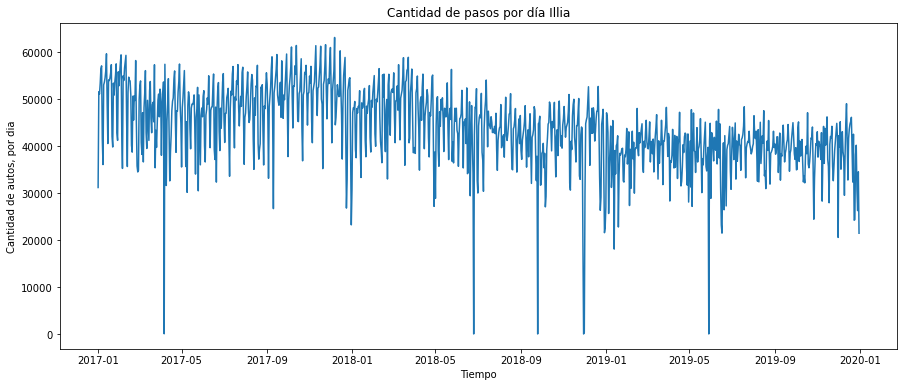

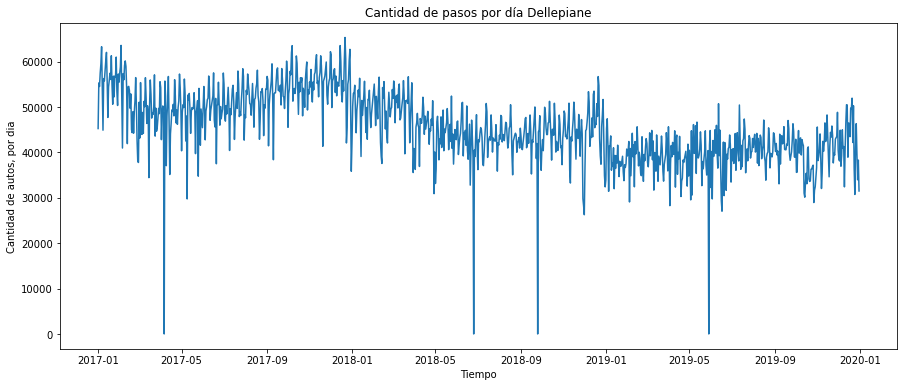

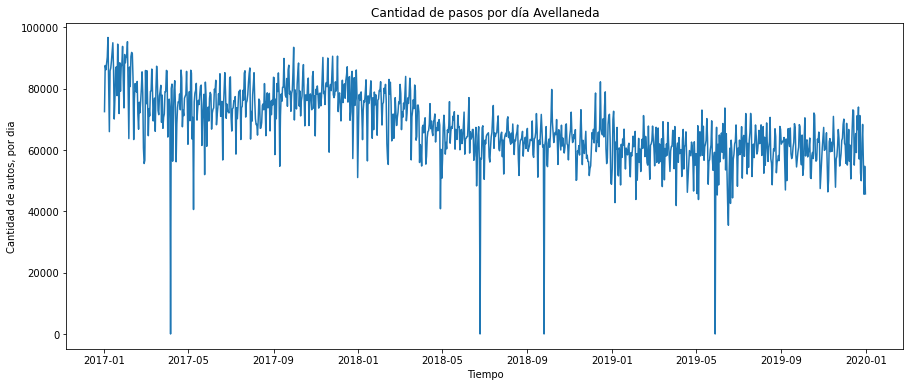

In [221]:
# plt.subplot(1,2,1)
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title("Cantidad de pasos por día Illia")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()


# plt.subplot(1,2,1)
plt.figure(figsize = (15,6))
plt.plot(DellepianeD.index, DellepianeD.cantidad_pasos)
plt.title("Cantidad de pasos por día Dellepiane")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()


# plt.subplot(1,2,1)
plt.figure(figsize = (15,6))
plt.plot(AvellanedaD.index, AvellanedaD.cantidad_pasos)
plt.title("Cantidad de pasos por día Avellaneda")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

De acuerdo a lo anterior podemos ver que la estación Dellapiane presenta una estacionalidad mensual mas notoría y presenta ligera tendencia a la baja de forma anual, mientras que la estación Avellaneda de igual forma presenta una tendencia a la baja de forma menos exponencial y a simple vista no se observa alguna estacionalidad al igual que la estación Illia

3. ¿Hay algo que te gustaría investigar o probar?

De acuerdo a los resultados obtenidos, podemos observar que el modelo de Benchmark (Regresion Lineal) que utilizamos presentó resultados muy buenos y similares a los del modelo optimizado con "Xgboost" y al modelo ocupado con Prophet, por lo que sería bueno probar lo siguiente:


- Un modelo de regresión avanzada agregando atributos polinómicos ya que podriamos trabajar con 1 feature y agregar los atributos polinómicos y en su caso aplicar regularización para mejor los resultados del modelo.


- Trabajar con módelos clasicos como ARMA y ARIMA; ya son modelos estadisticos y muy funcionales para series de tiempo, ya que con los modelos que trabajamos como Prophet y Xgboost son mas actuales y el caso de Xgboost no es un modelo especializado para series de tiempo

- Por último seria muy recomendable probar con un modelo de redes neuronales LSTM, ya que estre tipo de redes son son ampliamente utilizadas en problemas de predicción en series temporales debido a que su diseño permite recordar la información durante largos períodos y facilita la tarea de hacer estimaciones futura empleando períodos de registros históricos.

#### Artículo y sobre explicación y aplicación de Series de tiempo con redes neuronales

https://www.apsl.net/blog/2017/06/14/analisis-de-series-temporales-usando-redes-neuronales-recurrentes/

#### ¿Que resultados esperamos encontar?

Con los modelos que buscariamos probar, especialmente con Redes Neuronales se buscaría una prediccion con mayor performance, donde el error sea mínimo y la predicción mantega la misma tendencia que la serie, ya que observando los resultados de los modelos aplicados "regresión lineal" y "Xgboost", el error se encontraba entre un rango del 12% y 8% y estos se encontraban principalmente abajo de lo 33 mil pasos y la tendencia de la predicción se encuentra muy estable sin seguir la tendencia de la serie, como por ejemplo la siguiente imagen:

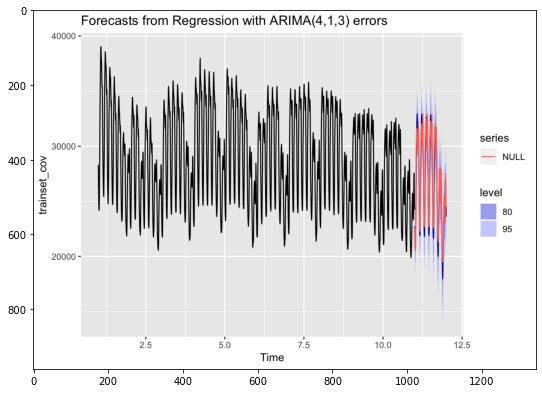

In [23]:
import matplotlib.image as mpimg
image = mpimg.imread("ts.png")
plt.figure(figsize=(9,9))
plt.imshow(image)
plt.show()